In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)
  
    return 'SMAPE',round(
            np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2))*100, 4), False

In [3]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

In [4]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [6]:
train_eng = pd.read_csv('train_engineered.csv')
train_eng

,id,date,num_sold,Year,Qtr,Month,Month_Sin,Month_Cos,Day,Day_Sin,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,0,2017-01-01,63,2017,1,1,5.000000e-01,0.866025,1,0.5,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,1,2017-01-01,66,2017,1,1,5.000000e-01,0.866025,1,0.5,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,2,2017-01-01,9,2017,1,1,5.000000e-01,0.866025,1,0.5,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,3,2017-01-01,59,2017,1,1,5.000000e-01,0.866025,1,0.5,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,4,2017-01-01,49,2017,1,1,5.000000e-01,0.866025,1,0.5,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,700,2021,4,12,-2.449294e-16,1.000000,31,-0.5,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136946,136946,2021-12-31,752,2021,4,12,-2.449294e-16,1.000000,31,-0.5,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136947,136947,2021-12-31,111,2021,4,12,-2.449294e-16,1.000000,31,-0.5,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136948,136948,2021-12-31,641,2021,4,12,-2.449294e-16,1.000000,31,-0.5,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [23]:
test_eng = pd.read_csv('test_engineered.csv')
test_eng

,id,date,Year,Qtr,Month,Month_Sin,Month_Cos,Day,Day_Sin,Day_Cos,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,136950,2022-01-01,2022,1,1,5.000000e-01,0.866025,1,0.5,0.866025,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,136951,2022-01-01,2022,1,1,5.000000e-01,0.866025,1,0.5,0.866025,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,136952,2022-01-01,2022,1,1,5.000000e-01,0.866025,1,0.5,0.866025,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,136953,2022-01-01,2022,1,1,5.000000e-01,0.866025,1,0.5,0.866025,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,136954,2022-01-01,2022,1,1,5.000000e-01,0.866025,1,0.5,0.866025,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,1.000000,31,-0.5,-0.866025,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,1.000000,31,-0.5,-0.866025,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,1.000000,31,-0.5,-0.866025,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,1.000000,31,-0.5,-0.866025,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [24]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)
train_eng.date = pd.to_datetime(train_eng.date)
test_eng.date = pd.to_datetime(test_eng.date)

## Applying ensemble models

In [25]:
import catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

from sklearn.model_selection import TimeSeriesSplit, GroupKFold
from sklearn.preprocessing import StandardScaler, RobustScaler

import optuna
np.random.seed(5)

In [88]:
train_eng2 = train_eng.loc[~train_eng.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-31'))].copy()
# train_eng2['unemp_rate'] = 1/train_eng2['unemp_rate']
# test_eng['unemp_rate'] = 1/test_eng['unemp_rate']
# train_eng2['cpi'] = np.log(train_eng2['cpi'])
# test_eng['cpi'] = np.log(test_eng['cpi'])
X = train_eng2.drop(['id','num_sold','date','gdp_mktp'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [89]:
features = X.columns.to_list()
target = 'num_sold'
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Month_Cos', 'Day', 'Day_Sin', 'Day_Cos', 'Weekday', 'Week_Nb', 'DayofYear', 'is_fri', 'is_sat', 'is_sun', 'is_weekday', 'Is_ImpDate', 'is_covid', 'spline0', 'spline1', 'spline2', 'spline3', 'gdp_pcap', 'cpi', 'unemp_rate', 'Is_Holiday', 'Estonia', 'Japan', 'Spain', 'Canada', 'Argentina', 'Using LLMs to Train More LLMs', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Write Better', 'Using LLMs to Win Friends and Influence People', 'Using LLMs to Improve Your Coding', 'Kagglazon', 'Kaggle Learn', 'Kaggle Store', 'sin1', 'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1', 'WB_cos1']


In [86]:
(train_eng2.groupby(train_eng2.date.dt.year).mean()['cpi'].values)

array([ 6.62687915,  8.5297257 , 11.7889647 ,  8.38894394, 11.86362845])

In [87]:
(test_eng['cpi'].mean())

26.37786873687813

In [30]:
(train_eng2.groupby(train_eng2.date.dt.year).mean()['cpi'].values)

array([ 6.62687915,  8.5297257 , 11.7889647 ,  8.38894394, 11.86362845])

In [72]:
def predict_plot(model, loss_correction):
    scaler = StandardScaler()
    scaler.fit(X)
    example_df = pd.concat([train_eng2, test_eng])
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold*loss_correction, label='prediction')
    ori_df = train_data_ori.copy()
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('All Predictions and true num_sold for 6 years')
    plt.show()

In [73]:
def eval_model(y_val, y_hat):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_val, y_hat, s=1, color='r')
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()
    
    residuals = np.log(y_hat) - np.log(y_val)
    
    plt.figure(figsize=(18, 4))
    plt.scatter(np.arange(len(residuals)), residuals, s=1)
    plt.title('All residuals by row number')
    plt.ylabel('residual')
    plt.show()
    
    plt.figure(figsize=(18, 4))
    plt.hist(residuals, bins=200)
    plt.title('Histogram of all residuals')
    plt.show()
    print(f"Standard deviation of log residuals: {residuals.std():.3f}")
    plt.show()

In [147]:
tscv = TimeSeriesSplit(n_splits=4, test_size=27350)
for fold, (train_idx, val_idx) in enumerate(tscv.split(train_eng2)):
    train = train_eng2.iloc[train_idx]
    if 2021 in list(set(train.Year)):
        train = train.loc[train.Year!=2021]
    val = train_eng2.loc[train_eng.Year==2021]
    print('Training on these years', set(train.Year))
    print('Validating on these years', set(val.Year)) 

Training on these years {2017}
Validating on these years {2021}
Training on these years {2017, 2018}
Validating on these years {2021}
Training on these years {2017, 2018, 2019}
Validating on these years {2021}
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}


In [148]:
def train_model(model, params, split_method='cv', evaluate=False):
    scores = []
    start_time = datetime.now()
    if split_method == 'cv':
        tscv = TimeSeriesSplit(n_splits=4, test_size=27350)
        for fold, (train_idx, val_idx) in enumerate(tscv.split(train_eng2)):
            train = train_eng2.iloc[train_idx]
            if 2021 in list(set(train.Year)):
                train = train.loc[train.Year!=2021]
            val = train_eng2.loc[train_eng2.Year==2021]
            print('Training on these years', set(train.Year))
            print('Validating on these years', set(val.Year)) 
            X_train = train[features]
            y_train = np.log(train[target])
            X_val = val[features]
            y_val = val[target]
            scaler = StandardScaler()
            X_tr_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            if model=='cbr':
                model = CatBoostRegressor(**params, random_state=5, verbose=0,
                                          early_stopping_rounds=100, n_estimators=1000)
                model.fit(X_tr_scaled, y_train, 
                          eval_set=(scaler.transform(train_eng2.loc[train_eng2['Year']==2021,features]),
                                    np.log(train_eng2.loc[train_eng2['Year']==2021,target].values)))
            elif model=='xgb':
                model = XGBRegressor(**params, random_state=5, 
                                     objective='reg:squarederror', 
                                     early_stopping_rounds=100, n_estimators=1000,
                                     n_jobs=-1,eval_metric='mape')
                model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))])
            elif model=='lgbm':
                model = LGBMRegressor(**params, random_state=5, verbose=0, 
                                      num_boost_round=100,
                                      n_jobs=-1,
                                      early_stopping_round=100, n_estimators=1000,
                                      objective='regression_l1',
                                      )
                model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))], eval_metric=calculate_smape)


            y_hat = np.exp(model.predict(X_val_scaled))
        #     oof.update(pd.Series(y_hat, index=X_val.index))
            _, smape_bc, _ = calculate_smape(np.array(y_val),np.array(y_hat))
            _, smape_ac, _ = calculate_smape(np.array(y_val),np.array(y_hat)*1.05)
            print(f"Fold {fold} | {str(datetime.now() - start_time)[-12:-7]}"
                  f" | SMAPE BC: {smape_bc:.5f}| SMAPE AC: {smape_ac:.5f}")
        #      
            scores.append(smape_bc)
#             if fold==2:
#                 last_smape = smape_bc
#                 return last_smape, model
            if (fold==0)&(evaluate):
                eval_model(y_val, y_hat)
    elif split_method =='group':
        kf = GroupKFold(n_splits=4)
        train_eng2_2 = train_eng2.loc[train_eng2.Year!=2021]
        for fold, (train_idx, val_idx) in enumerate(kf.split(train_eng2_2, groups=train_eng2_2.date.dt.year)):
            train = train_eng2_2.iloc[train_idx]
            val = train_eng2.loc[train_eng2.Year==2021]
            print('Training on these years', set(train.Year))
            print('Validating on these years', set(val.Year)) 
            X_train = train[features]
            y_train = np.log(train[target])
            X_val = val[features]
            y_val = val[target]
            scaler = StandardScaler()
            X_tr_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            if model=='cbr':
                model = CatBoostRegressor(**params, random_state=5, verbose=0,
                                          early_stopping_rounds=75, n_estimators=1000)
                model.fit(X_tr_scaled, y_train, eval_set=(X_val_scaled, np.log(y_val)))
            elif model=='xgb':
                model = XGBRegressor(**params, random_state=5, 
                                     objective='reg:squarederror',
                                     early_stopping_rounds=75, n_estimators=1000,
                                     n_jobs=-1,eval_metric='mape')
                model.fit(X_tr_scaled, y_train, eval_set=[
                    (scaler.transform(train_eng2.loc[train_eng2['Year']==2021,features]),
                    np.log(train_eng2.loc[train_eng2['Year']==2021,target].values))
                ])
            elif model=='lgbm':
                model = LGBMRegressor(**params, random_state=5, verbose=0, 
#                                       num_boost_round=100,
                                      n_jobs=-1,
                                      early_stopping_round=75, n_estimators=1000,
                                      objective='regression_l1',
                                      )
                model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))], eval_metric=calculate_smape)


            y_hat = np.exp(model.predict(X_val_scaled))
        #     oof.update(pd.Series(y_hat, index=X_val.index))
            _, smape_bc, _ = calculate_smape(np.array(y_val),np.array(y_hat))
            _, smape_ac, _ = calculate_smape(np.array(y_val),np.array(y_hat))
            print(f"Fold {fold} | {str(datetime.now() - start_time)[-12:-7]}"
                  f" | SMAPE BC: {smape_bc:.5f}| SMAPE AC: {smape_ac:.5f}")
        #      
            scores.append(smape_bc)
            if (fold==0)&(evaluate):
                eval_model(y_val, y_hat)
    else:
        train = train_eng2.loc[train_eng2.Year!=2021]
        val = train_eng2.loc[train_eng2.Year==2021]
        print('Training on these years', set(train.Year))
        print('Validating on these years', set(val.Year)) 
        X_train = train[features]
        y_train = np.log(train[target])
        X_val = val[features]
        y_val = val[target]
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        if model=='cbr':
            model = CatBoostRegressor(**params, random_state=5, verbose=0,
                                      early_stopping_rounds=100, n_estimators=1000)
            model.fit(X_tr_scaled, y_train, eval_set=(X_val_scaled, np.log(y_val)))
        elif model=='xgb':
            model = XGBRegressor(**params, random_state=5, 
                                 objective='reg:squarederror', 
                                 early_stopping_rounds=100, n_estimators=1000,
                                 n_jobs=-1,eval_metric='mape')
            model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))])
        elif model=='lgbm':
            model = LGBMRegressor(**params, random_state=5, verbose=0, 
                                  num_boost_round=100,
                                  n_jobs=-1,
                                  early_stopping_round=100, n_estimators=1000,
                                  objective='regression_l1',
                                  )
            model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))], eval_metric=calculate_smape)
                
        y_hat = np.exp(model.predict(X_val_scaled))
#         oof.update(pd.Series(y_hat, index=X_val.index))
        _, smape_bc, _ = calculate_smape(np.array(y_val),np.array(y_hat))
        _, smape_ac, _ = calculate_smape(np.array(y_val),np.array(y_hat*1.1))
        print(f"{str(datetime.now() - start_time)[-12:-7]}"
              f" | SMAPE BC: {smape_bc:.5f}| SMAPE AC: {smape_ac:.5f}") 
        if evaluate:
            eval_model(y_val, y_hat)
        return smape_bc, model

    return np.mean(scores), model

In [101]:
def run_model(model, split_method='cv', n_trials=20):
    def objective(trial):
        # Define the hyperparameter search space
        if model=='cbr':
            params = {
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
                'depth': trial.suggest_int('depth', 2, 10),
                'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 1e2),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.5, 5)
            }
        if model=='xgb':
            params = {
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
                'max_depth':trial.suggest_int('max_depth', 4, 10),
                'gamma': trial.suggest_loguniform('gamma', 1e-4, 0.1),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-9, 0.1),
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-7, 2),
            }
        if model=='lgbm':
            params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
            'lambda': trial.suggest_loguniform('lambda', 1e-5, 10),
            'alpha': trial.suggest_loguniform('alpha', 1e-5, 5),
        }
        smape, _ = train_model(model, params, split_method)
        return smape
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params
    best_score = study.best_value
    print('The best parameters are:', best_params)
    print('The best SMAPE is:', best_score)
    return best_params

## Catboost Regressor

In [38]:
best_params = run_model('cbr', 'group', 25)

[I 2023-07-31 11:43:25,706] A new study created in memory with name: no-name-653aea50-e08e-42f2-9fab-8fe2f08d3ac3


Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:20 | SMAPE BC: 8.73460| SMAPE AC: 8.73460
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:21 | SMAPE BC: 5.42940| SMAPE AC: 5.42940
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:21 | SMAPE BC: 4.71260| SMAPE AC: 4.71260
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:21 | SMAPE BC: 4.31270| SMAPE AC: 4.31270
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:43:48,170] Trial 0 finished with value: 5.74314 and parameters: {'learning_rate': 0.07350905965201324, 'depth': 7, 'l2_leaf_reg': 12.987715028819895, 'border_count': 238, 'bagging_temperature': 0.9065249849849338}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:22 | SMAPE BC: 5.52640| SMAPE AC: 5.52640
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:16 | SMAPE BC: 13.22400| SMAPE AC: 13.22400
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:16 | SMAPE BC: 9.54390| SMAPE AC: 9.54390
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:16 | SMAPE BC: 10.21590| SMAPE AC: 10.21590
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:17 | SMAPE BC: 9.51410| SMAPE AC: 9.51410
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:44:06,031] Trial 1 finished with value: 10.77248 and parameters: {'learning_rate': 0.003526019483869286, 'depth': 5, 'l2_leaf_reg': 0.039148199477130795, 'border_count': 204, 'bagging_temperature': 0.6783955749059857}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:17 | SMAPE BC: 11.36450| SMAPE AC: 11.36450
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:11 | SMAPE BC: 8.64900| SMAPE AC: 8.64900
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:11 | SMAPE BC: 5.10820| SMAPE AC: 5.10820
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:12 | SMAPE BC: 5.59620| SMAPE AC: 5.59620
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:12 | SMAPE BC: 5.04510| SMAPE AC: 5.04510
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:44:19,265] Trial 2 finished with value: 5.91624 and parameters: {'learning_rate': 0.1353581571009179, 'depth': 2, 'l2_leaf_reg': 0.026589319823251592, 'border_count': 114, 'bagging_temperature': 2.7536300579228774}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:13 | SMAPE BC: 5.18270| SMAPE AC: 5.18270
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:17 | SMAPE BC: 9.29360| SMAPE AC: 9.29360
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:17 | SMAPE BC: 5.49330| SMAPE AC: 5.49330
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:18 | SMAPE BC: 5.61940| SMAPE AC: 5.61940
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:18 | SMAPE BC: 5.03890| SMAPE AC: 5.03890
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:44:38,352] Trial 3 finished with value: 6.21666 and parameters: {'learning_rate': 0.013821038850594748, 'depth': 6, 'l2_leaf_reg': 98.52688585895731, 'border_count': 37, 'bagging_temperature': 4.469093602480161}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:19 | SMAPE BC: 5.63810| SMAPE AC: 5.63810
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:16 | SMAPE BC: 12.01410| SMAPE AC: 12.01410
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:16 | SMAPE BC: 8.14010| SMAPE AC: 8.14010
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:17 | SMAPE BC: 8.93920| SMAPE AC: 8.93920
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:17 | SMAPE BC: 8.25750| SMAPE AC: 8.25750
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:44:56,347] Trial 4 finished with value: 9.364759999999999 and parameters: {'learning_rate': 0.004236895716891871, 'depth': 5, 'l2_leaf_reg': 0.003639472891254901, 'border_count': 252, 'bagging_temperature': 0.5058759501928938}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:17 | SMAPE BC: 9.47290| SMAPE AC: 9.47290
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:12 | SMAPE BC: 8.40610| SMAPE AC: 8.40610
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:13 | SMAPE BC: 5.49290| SMAPE AC: 5.49290
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:13 | SMAPE BC: 5.69390| SMAPE AC: 5.69390
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:13 | SMAPE BC: 4.93670| SMAPE AC: 4.93670
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:45:10,758] Trial 5 finished with value: 6.038680000000001 and parameters: {'learning_rate': 0.02203599900034208, 'depth': 4, 'l2_leaf_reg': 0.18088704342289044, 'border_count': 208, 'bagging_temperature': 2.9082879475612744}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:14 | SMAPE BC: 5.66380| SMAPE AC: 5.66380
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:10 | SMAPE BC: 13.13440| SMAPE AC: 13.13440
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:10 | SMAPE BC: 10.83020| SMAPE AC: 10.83020
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:10 | SMAPE BC: 11.52100| SMAPE AC: 11.52100
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:11 | SMAPE BC: 10.82860| SMAPE AC: 10.82860
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:45:22,596] Trial 6 finished with value: 11.86554 and parameters: {'learning_rate': 0.006798759739749557, 'depth': 2, 'l2_leaf_reg': 0.03151536695730433, 'border_count': 65, 'bagging_temperature': 2.624889035829271}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:11 | SMAPE BC: 13.01350| SMAPE AC: 13.01350
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:20 | SMAPE BC: 8.84240| SMAPE AC: 8.84240
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:20 | SMAPE BC: 5.51290| SMAPE AC: 5.51290
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:21 | SMAPE BC: 5.22170| SMAPE AC: 5.22170
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:21 | SMAPE BC: 4.56340| SMAPE AC: 4.56340
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:45:44,859] Trial 7 finished with value: 6.001099999999999 and parameters: {'learning_rate': 0.015107333405433587, 'depth': 8, 'l2_leaf_reg': 0.0794080120012365, 'border_count': 104, 'bagging_temperature': 1.9173079218732738}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:22 | SMAPE BC: 5.86510| SMAPE AC: 5.86510
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:22 | SMAPE BC: 8.68150| SMAPE AC: 8.68150
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:22 | SMAPE BC: 5.51280| SMAPE AC: 5.51280
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:23 | SMAPE BC: 5.22460| SMAPE AC: 5.22460
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:23 | SMAPE BC: 4.59910| SMAPE AC: 4.59910
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:46:08,762] Trial 8 finished with value: 5.94176 and parameters: {'learning_rate': 0.014294105752085666, 'depth': 8, 'l2_leaf_reg': 0.13841588185127826, 'border_count': 145, 'bagging_temperature': 2.10698794076652}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:23 | SMAPE BC: 5.69080| SMAPE AC: 5.69080
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:29 | SMAPE BC: 12.93560| SMAPE AC: 12.93560
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:29 | SMAPE BC: 8.18560| SMAPE AC: 8.18560
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:30 | SMAPE BC: 8.40610| SMAPE AC: 8.40610
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:30 | SMAPE BC: 7.75020| SMAPE AC: 7.75020
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:46:40,256] Trial 9 finished with value: 9.41172 and parameters: {'learning_rate': 0.003177805707244794, 'depth': 9, 'l2_leaf_reg': 1.9009746710804614, 'border_count': 233, 'bagging_temperature': 2.638941097878742}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:31 | SMAPE BC: 9.78110| SMAPE AC: 9.78110
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:51 | SMAPE BC: 37.25740| SMAPE AC: 37.25740
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:52 | SMAPE BC: 34.48230| SMAPE AC: 34.48230
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:52 | SMAPE BC: 33.72750| SMAPE AC: 33.72750
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:53 | SMAPE BC: 32.82030| SMAPE AC: 32.82030
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:47:34,202] Trial 10 finished with value: 34.952639999999995 and parameters: {'learning_rate': 0.0010214536139703198, 'depth': 10, 'l2_leaf_reg': 4.293787379078121, 'border_count': 170, 'bagging_temperature': 1.070108533394091}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:53 | SMAPE BC: 36.47570| SMAPE AC: 36.47570
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:10 | SMAPE BC: 8.77530| SMAPE AC: 8.77530
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:10 | SMAPE BC: 5.08660| SMAPE AC: 5.08660
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:11 | SMAPE BC: 5.67710| SMAPE AC: 5.67710
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:11 | SMAPE BC: 4.97190| SMAPE AC: 4.97190
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:47:46,168] Trial 11 finished with value: 5.946219999999999 and parameters: {'learning_rate': 0.15531302074094958, 'depth': 2, 'l2_leaf_reg': 0.0010236383538833713, 'border_count': 112, 'bagging_temperature': 1.2770857274557486}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:11 | SMAPE BC: 5.22020| SMAPE AC: 5.22020
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:10 | SMAPE BC: 11.36390| SMAPE AC: 11.36390
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:10 | SMAPE BC: 5.43860| SMAPE AC: 5.43860
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:11 | SMAPE BC: 4.78210| SMAPE AC: 4.78210
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:11 | SMAPE BC: 4.39940| SMAPE AC: 4.39940
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:47:58,325] Trial 12 finished with value: 6.8769599999999995 and parameters: {'learning_rate': 0.1305832026790792, 'depth': 7, 'l2_leaf_reg': 0.8682318418244623, 'border_count': 100, 'bagging_temperature': 1.0081654590140088}. Best is trial 0 with value: 5.74314.


Fold 4 | 00:12 | SMAPE BC: 8.40080| SMAPE AC: 8.40080
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:14 | SMAPE BC: 6.95440| SMAPE AC: 6.95440
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:14 | SMAPE BC: 5.39010| SMAPE AC: 5.39010
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:15 | SMAPE BC: 5.16870| SMAPE AC: 5.16870
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:15 | SMAPE BC: 4.43070| SMAPE AC: 4.43070
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:48:14,488] Trial 13 finished with value: 5.4383 and parameters: {'learning_rate': 0.06797024274774917, 'depth': 4, 'l2_leaf_reg': 12.3298440810806, 'border_count': 165, 'bagging_temperature': 1.5640572943018423}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:16 | SMAPE BC: 5.24760| SMAPE AC: 5.24760
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:13 | SMAPE BC: 7.65580| SMAPE AC: 7.65580
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:13 | SMAPE BC: 5.39660| SMAPE AC: 5.39660
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:14 | SMAPE BC: 5.27330| SMAPE AC: 5.27330
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:14 | SMAPE BC: 4.47990| SMAPE AC: 4.47990
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:48:29,665] Trial 14 finished with value: 5.6355200000000005 and parameters: {'learning_rate': 0.05784178979712173, 'depth': 4, 'l2_leaf_reg': 13.594163123248254, 'border_count': 176, 'bagging_temperature': 1.4125680156083658}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:15 | SMAPE BC: 5.37200| SMAPE AC: 5.37200
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:13 | SMAPE BC: 8.09880| SMAPE AC: 8.09880
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:13 | SMAPE BC: 5.44910| SMAPE AC: 5.44910
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:14 | SMAPE BC: 5.11790| SMAPE AC: 5.11790
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:14 | SMAPE BC: 4.53840| SMAPE AC: 4.53840
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:48:44,826] Trial 15 finished with value: 5.69322 and parameters: {'learning_rate': 0.04819037640767909, 'depth': 4, 'l2_leaf_reg': 33.08945198915107, 'border_count': 176, 'bagging_temperature': 1.5839568878713137}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:15 | SMAPE BC: 5.26190| SMAPE AC: 5.26190
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:14 | SMAPE BC: 8.02810| SMAPE AC: 8.02810
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:14 | SMAPE BC: 5.49600| SMAPE AC: 5.49600
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:14 | SMAPE BC: 5.08110| SMAPE AC: 5.08110
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:15 | SMAPE BC: 4.52960| SMAPE AC: 4.52960
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:49:00,715] Trial 16 finished with value: 5.68694 and parameters: {'learning_rate': 0.04760605870685331, 'depth': 4, 'l2_leaf_reg': 7.644610652878586, 'border_count': 151, 'bagging_temperature': 1.2402932395518147}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:15 | SMAPE BC: 5.29990| SMAPE AC: 5.29990
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:12 | SMAPE BC: 7.38980| SMAPE AC: 7.38980
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:12 | SMAPE BC: 5.20800| SMAPE AC: 5.20800
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:13 | SMAPE BC: 5.47270| SMAPE AC: 5.47270
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:13 | SMAPE BC: 4.87670| SMAPE AC: 4.87670
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:49:14,946] Trial 17 finished with value: 5.6633 and parameters: {'learning_rate': 0.0699985733163632, 'depth': 3, 'l2_leaf_reg': 1.4383113890029269, 'border_count': 190, 'bagging_temperature': 1.5468182604905023}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:14 | SMAPE BC: 5.36930| SMAPE AC: 5.36930
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:08 | SMAPE BC: 8.95570| SMAPE AC: 8.95570
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:08 | SMAPE BC: 5.40670| SMAPE AC: 5.40670
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:09 | SMAPE BC: 5.69770| SMAPE AC: 5.69770
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:09 | SMAPE BC: 4.64600| SMAPE AC: 4.64600
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:49:24,975] Trial 18 finished with value: 5.996860000000001 and parameters: {'learning_rate': 0.19598791964842788, 'depth': 5, 'l2_leaf_reg': 24.6136699674221, 'border_count': 161, 'bagging_temperature': 0.8391637400801542}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:09 | SMAPE BC: 5.27820| SMAPE AC: 5.27820
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:11 | SMAPE BC: 10.22470| SMAPE AC: 10.22470
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:11 | SMAPE BC: 5.31730| SMAPE AC: 5.31730
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:12 | SMAPE BC: 5.80240| SMAPE AC: 5.80240
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:12 | SMAPE BC: 5.36540| SMAPE AC: 5.36540
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:49:38,192] Trial 19 finished with value: 6.45108 and parameters: {'learning_rate': 0.031227381948868097, 'depth': 3, 'l2_leaf_reg': 4.2103062649585095, 'border_count': 213, 'bagging_temperature': 1.485851771514464}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:13 | SMAPE BC: 5.54560| SMAPE AC: 5.54560
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:14 | SMAPE BC: 7.80470| SMAPE AC: 7.80470
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:14 | SMAPE BC: 5.52800| SMAPE AC: 5.52800
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:15 | SMAPE BC: 5.00790| SMAPE AC: 5.00790
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:15 | SMAPE BC: 4.59650| SMAPE AC: 4.59650
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:49:54,393] Trial 20 finished with value: 5.590839999999999 and parameters: {'learning_rate': 0.09150060810991478, 'depth': 6, 'l2_leaf_reg': 70.74285667992274, 'border_count': 136, 'bagging_temperature': 1.9366206123829923}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:16 | SMAPE BC: 5.01710| SMAPE AC: 5.01710
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:16 | SMAPE BC: 8.07560| SMAPE AC: 8.07560
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:16 | SMAPE BC: 5.57590| SMAPE AC: 5.57590
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:17 | SMAPE BC: 5.02640| SMAPE AC: 5.02640
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:17 | SMAPE BC: 4.54550| SMAPE AC: 4.54550
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:50:12,466] Trial 21 finished with value: 5.66296 and parameters: {'learning_rate': 0.08506278692387566, 'depth': 6, 'l2_leaf_reg': 83.2188448387923, 'border_count': 130, 'bagging_temperature': 1.9224406410024195}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:18 | SMAPE BC: 5.09140| SMAPE AC: 5.09140
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:13 | SMAPE BC: 7.33770| SMAPE AC: 7.33770
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:13 | SMAPE BC: 5.21520| SMAPE AC: 5.21520
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:14 | SMAPE BC: 5.38830| SMAPE AC: 5.38830
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:14 | SMAPE BC: 4.92240| SMAPE AC: 4.92240
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:50:27,856] Trial 22 finished with value: 5.620480000000001 and parameters: {'learning_rate': 0.0957084124771021, 'depth': 3, 'l2_leaf_reg': 23.136108033649393, 'border_count': 184, 'bagging_temperature': 1.2962256173827433}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:15 | SMAPE BC: 5.23880| SMAPE AC: 5.23880
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:12 | SMAPE BC: 7.48230| SMAPE AC: 7.48230
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:12 | SMAPE BC: 5.18650| SMAPE AC: 5.18650
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:12 | SMAPE BC: 5.40780| SMAPE AC: 5.40780
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:13 | SMAPE BC: 4.93920| SMAPE AC: 4.93920
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:50:41,775] Trial 23 finished with value: 5.64294 and parameters: {'learning_rate': 0.09423566852621626, 'depth': 3, 'l2_leaf_reg': 38.70622789892587, 'border_count': 136, 'bagging_temperature': 1.20176002648502}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:13 | SMAPE BC: 5.19890| SMAPE AC: 5.19890
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:14 | SMAPE BC: 8.98160| SMAPE AC: 8.98160
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:14 | SMAPE BC: 5.42290| SMAPE AC: 5.42290
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:15 | SMAPE BC: 5.89920| SMAPE AC: 5.89920
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:15 | SMAPE BC: 4.39540| SMAPE AC: 4.39540
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 11:50:57,864] Trial 24 finished with value: 5.96422 and parameters: {'learning_rate': 0.10869288220707897, 'depth': 5, 'l2_leaf_reg': 40.08156735195725, 'border_count': 79, 'bagging_temperature': 1.5333511543330727}. Best is trial 13 with value: 5.4383.


Fold 4 | 00:16 | SMAPE BC: 5.12200| SMAPE AC: 5.12200
The best parameters are: {'learning_rate': 0.06797024274774917, 'depth': 4, 'l2_leaf_reg': 12.3298440810806, 'border_count': 165, 'bagging_temperature': 1.5640572943018423}
The best SMAPE is: 5.4383


The best parameters are: {'learning_rate': 0.12126966741024223, 'depth': 5, 'l2_leaf_reg': 0.018081322389029465, 'border_count': 105, 'bagging_temperature': 1.3333023830175452}

The best parameters are: {'learning_rate': 0.19317786281697447, 'depth': 3, 'l2_leaf_reg': 12.056785559590471, 'border_count': 150, 'bagging_temperature': 4.2220076509930315}

Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 0 | 00:14 | SMAPE BC: 6.95440| SMAPE AC: 6.95440


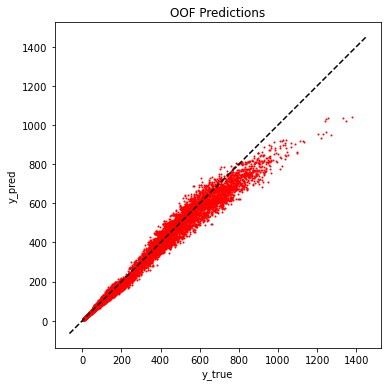

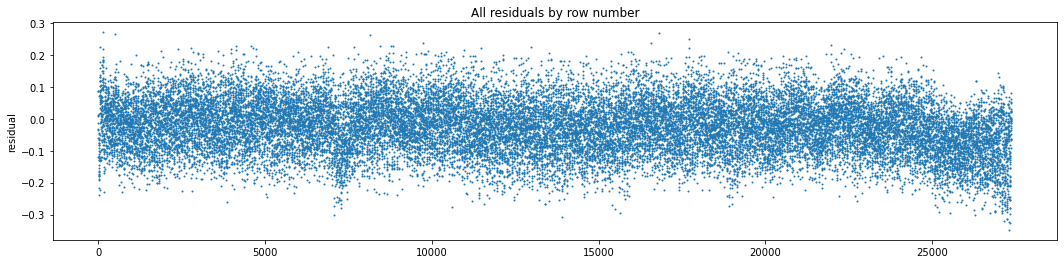

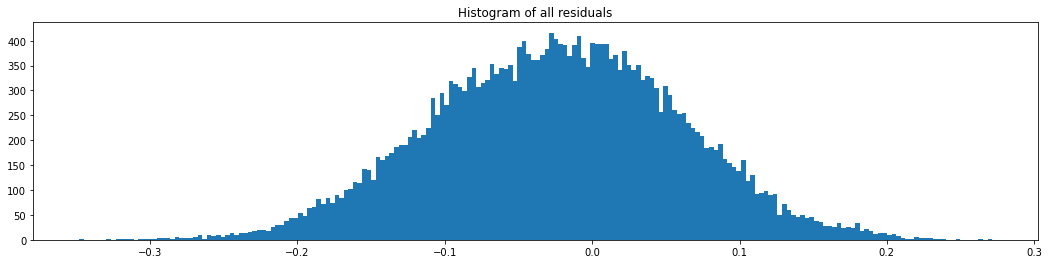

Standard deviation of log residuals: 0.083
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:15 | SMAPE BC: 5.39010| SMAPE AC: 5.39010
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:16 | SMAPE BC: 5.16870| SMAPE AC: 5.16870
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:16 | SMAPE BC: 4.43070| SMAPE AC: 4.43070
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}
Fold 4 | 00:17 | SMAPE BC: 5.24760| SMAPE AC: 5.24760


In [39]:
_, cb_model = train_model('cbr', best_params, 'group', True)

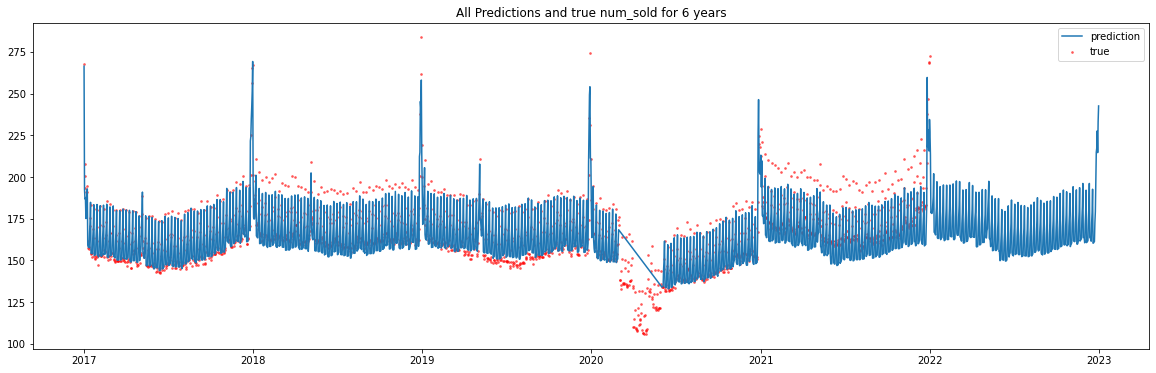

In [40]:
predict_plot(cb_model,1)

### Submission

In [41]:
# make predictions
y_hat = np.exp(cb_model.predict(test_eng[features]))
y_hat

array([ 72.99517029,  78.59683947,  15.0975254 , ..., 101.4035307 ,
       549.42107496, 498.51283025])

In [42]:
sub = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,72.995170
1,136951,78.596839
2,136952,15.097525
3,136953,69.603660
4,136954,63.159500
...,...,...
27370,164320,581.069326
27371,164321,613.848094
27372,164322,101.403531
27373,164323,549.421075


In [43]:
sub.iloc[:151,:].mean()

id          137025.000000
num_sold       187.948983
dtype: float64

In [406]:
sub.to_csv('submissions/sub33.csv', index=False)

In [43]:
pd.read_csv('submissions/sub20.csv').iloc[:151,:].mean()

id          137025.000000
num_sold       271.395889
dtype: float64

## XGBoost Regressor

In [151]:
best_params = run_model('xgb','cv', 20)

[I 2023-07-31 15:45:16,039] A new study created in memory with name: no-name-f5612ba1-6b9c-4e44-bd32-ada518f2675b


Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.87593
[1]	validation_0-mape:0.87105
[2]	validation_0-mape:0.86633
[3]	validation_0-mape:0.86165
[4]	validation_0-mape:0.85684
[5]	validation_0-mape:0.85221
[6]	validation_0-mape:0.84761
[7]	validation_0-mape:0.84333
[8]	validation_0-mape:0.83878
[9]	validation_0-mape:0.83425
[10]	validation_0-mape:0.82974
[11]	validation_0-mape:0.82526
[12]	validation_0-mape:0.82080
[13]	validation_0-mape:0.81636
[14]	validation_0-mape:0.81195
[15]	validation_0-mape:0.80756
[16]	validation_0-mape:0.80320
[17]	validation_0-mape:0.79911
[18]	validation_0-mape:0.79479
[19]	validation_0-mape:0.79079
[20]	validation_0-mape:0.78651
[21]	validation_0-mape:0.78255
[22]	validation_0-mape:0.77820
[23]	validation_0-mape:0.77429
[24]	validation_0-mape:0.76993
[25]	validation_0-mape:0.76578
[26]	validation_0-mape:0.76165
[27]	validation_0-mape:0.75754
[28]	validation_0-mape:0.75345
[29]	validation_0-mape:0.74965
[30]	validation_

[257]	validation_0-mape:0.22315
[258]	validation_0-mape:0.22199
[259]	validation_0-mape:0.22093
[260]	validation_0-mape:0.21978
[261]	validation_0-mape:0.21865
[262]	validation_0-mape:0.21761
[263]	validation_0-mape:0.21650
[264]	validation_0-mape:0.21538
[265]	validation_0-mape:0.21427
[266]	validation_0-mape:0.21316
[267]	validation_0-mape:0.21207
[268]	validation_0-mape:0.21100
[269]	validation_0-mape:0.20992
[270]	validation_0-mape:0.20884
[271]	validation_0-mape:0.20783
[272]	validation_0-mape:0.20682
[273]	validation_0-mape:0.20577
[274]	validation_0-mape:0.20467
[275]	validation_0-mape:0.20363
[276]	validation_0-mape:0.20265
[277]	validation_0-mape:0.20159
[278]	validation_0-mape:0.20063
[279]	validation_0-mape:0.19961
[280]	validation_0-mape:0.19861
[281]	validation_0-mape:0.19757
[282]	validation_0-mape:0.19656
[283]	validation_0-mape:0.19556
[284]	validation_0-mape:0.19458
[285]	validation_0-mape:0.19361
[286]	validation_0-mape:0.19262
[287]	validation_0-mape:0.19166
[288]	va

[514]	validation_0-mape:0.07669
[515]	validation_0-mape:0.07650
[516]	validation_0-mape:0.07630
[517]	validation_0-mape:0.07610
[518]	validation_0-mape:0.07593
[519]	validation_0-mape:0.07574
[520]	validation_0-mape:0.07556
[521]	validation_0-mape:0.07538
[522]	validation_0-mape:0.07518
[523]	validation_0-mape:0.07500
[524]	validation_0-mape:0.07483
[525]	validation_0-mape:0.07465
[526]	validation_0-mape:0.07449
[527]	validation_0-mape:0.07431
[528]	validation_0-mape:0.07414
[529]	validation_0-mape:0.07396
[530]	validation_0-mape:0.07379
[531]	validation_0-mape:0.07362
[532]	validation_0-mape:0.07346
[533]	validation_0-mape:0.07329
[534]	validation_0-mape:0.07312
[535]	validation_0-mape:0.07295
[536]	validation_0-mape:0.07279
[537]	validation_0-mape:0.07262
[538]	validation_0-mape:0.07246
[539]	validation_0-mape:0.07230
[540]	validation_0-mape:0.07213
[541]	validation_0-mape:0.07197
[542]	validation_0-mape:0.07182
[543]	validation_0-mape:0.07165
[544]	validation_0-mape:0.07149
[545]	va

[770]	validation_0-mape:0.05240
[771]	validation_0-mape:0.05236
[772]	validation_0-mape:0.05231
[773]	validation_0-mape:0.05228
[774]	validation_0-mape:0.05224
[775]	validation_0-mape:0.05220
[776]	validation_0-mape:0.05216
[777]	validation_0-mape:0.05212
[778]	validation_0-mape:0.05208
[779]	validation_0-mape:0.05204
[780]	validation_0-mape:0.05200
[781]	validation_0-mape:0.05196
[782]	validation_0-mape:0.05192
[783]	validation_0-mape:0.05188
[784]	validation_0-mape:0.05185
[785]	validation_0-mape:0.05181
[786]	validation_0-mape:0.05177
[787]	validation_0-mape:0.05174
[788]	validation_0-mape:0.05170
[789]	validation_0-mape:0.05166
[790]	validation_0-mape:0.05163
[791]	validation_0-mape:0.05159
[792]	validation_0-mape:0.05155
[793]	validation_0-mape:0.05152
[794]	validation_0-mape:0.05149
[795]	validation_0-mape:0.05146
[796]	validation_0-mape:0.05142
[797]	validation_0-mape:0.05138
[798]	validation_0-mape:0.05135
[799]	validation_0-mape:0.05132
[800]	validation_0-mape:0.05128
[801]	va

[I 2023-07-31 15:45:39,237] Trial 0 finished with value: 19.171999999999997 and parameters: {'learning_rate': 0.00536681198594866, 'max_depth': 6, 'gamma': 0.0056910747345020486, 'subsample': 0.7550163270788682, 'colsample_bytree': 0.8452171694070092, 'reg_alpha': 1.2739175341583548e-06, 'reg_lambda': 0.08343548665386717}. Best is trial 0 with value: 19.171999999999997.


Fold 3 | 00:23 | SMAPE BC: 19.18660| SMAPE AC: 17.45670
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.85412
[1]	validation_0-mape:0.82756
[2]	validation_0-mape:0.80257
[3]	validation_0-mape:0.77834
[4]	validation_0-mape:0.75405
[5]	validation_0-mape:0.73127
[6]	validation_0-mape:0.70918
[7]	validation_0-mape:0.68836
[8]	validation_0-mape:0.66759
[9]	validation_0-mape:0.64743
[10]	validation_0-mape:0.62788
[11]	validation_0-mape:0.60892
[12]	validation_0-mape:0.59054
[13]	validation_0-mape:0.57270
[14]	validation_0-mape:0.55539
[15]	validation_0-mape:0.53862
[16]	validation_0-mape:0.52141
[17]	validation_0-mape:0.50631
[18]	validation_0-mape:0.49111
[19]	validation_0-mape:0.47737
[20]	validation_0-mape:0.46305
[21]	validation_0-mape:0.45009
[22]	validation_0-mape:0.43594
[23]	validation_0-mape:0.42341
[24]	validation_0-mape:0.41017
[25]	validation_0-mape:0.39794
[26]	validation_0-mape:0.38581
[27]	validation_0-mape:0.37426
[28]	validation_0-mape

[256]	validation_0-mape:0.04711
[257]	validation_0-mape:0.04708
[258]	validation_0-mape:0.04708
[259]	validation_0-mape:0.04707
[260]	validation_0-mape:0.04705
[261]	validation_0-mape:0.04705
[262]	validation_0-mape:0.04704
[263]	validation_0-mape:0.04702
[264]	validation_0-mape:0.04700
[265]	validation_0-mape:0.04698
[266]	validation_0-mape:0.04695
[267]	validation_0-mape:0.04694
[268]	validation_0-mape:0.04693
[269]	validation_0-mape:0.04693
[270]	validation_0-mape:0.04692
[271]	validation_0-mape:0.04692
[272]	validation_0-mape:0.04690
[273]	validation_0-mape:0.04689
[274]	validation_0-mape:0.04688
[275]	validation_0-mape:0.04686
[276]	validation_0-mape:0.04686
[277]	validation_0-mape:0.04683
[278]	validation_0-mape:0.04683
[279]	validation_0-mape:0.04681
[280]	validation_0-mape:0.04681
[281]	validation_0-mape:0.04681
[282]	validation_0-mape:0.04678
[283]	validation_0-mape:0.04678
[284]	validation_0-mape:0.04677
[285]	validation_0-mape:0.04676
[286]	validation_0-mape:0.04676
[287]	va

[513]	validation_0-mape:0.04611
[514]	validation_0-mape:0.04611
[515]	validation_0-mape:0.04610
[516]	validation_0-mape:0.04610
[517]	validation_0-mape:0.04610
[518]	validation_0-mape:0.04610
[519]	validation_0-mape:0.04610
[520]	validation_0-mape:0.04609
[521]	validation_0-mape:0.04609
[522]	validation_0-mape:0.04609
[523]	validation_0-mape:0.04609
[524]	validation_0-mape:0.04609
[525]	validation_0-mape:0.04609
[526]	validation_0-mape:0.04609
[527]	validation_0-mape:0.04609
[528]	validation_0-mape:0.04609
[529]	validation_0-mape:0.04609
[530]	validation_0-mape:0.04609
[531]	validation_0-mape:0.04609
[532]	validation_0-mape:0.04609
[533]	validation_0-mape:0.04609
[534]	validation_0-mape:0.04609
[535]	validation_0-mape:0.04609
[536]	validation_0-mape:0.04609
[537]	validation_0-mape:0.04609
[538]	validation_0-mape:0.04609
[539]	validation_0-mape:0.04609
[540]	validation_0-mape:0.04609
[541]	validation_0-mape:0.04609
[542]	validation_0-mape:0.04608
[543]	validation_0-mape:0.04608
[544]	va

[770]	validation_0-mape:0.04597
[771]	validation_0-mape:0.04597
[772]	validation_0-mape:0.04597
[773]	validation_0-mape:0.04597
[774]	validation_0-mape:0.04597
[775]	validation_0-mape:0.04597
[776]	validation_0-mape:0.04601
[777]	validation_0-mape:0.04602
[778]	validation_0-mape:0.04601
[779]	validation_0-mape:0.04602
[780]	validation_0-mape:0.04601
[781]	validation_0-mape:0.04601
[782]	validation_0-mape:0.04601
[783]	validation_0-mape:0.04601
[784]	validation_0-mape:0.04601
[785]	validation_0-mape:0.04601
[786]	validation_0-mape:0.04601
[787]	validation_0-mape:0.04601
[788]	validation_0-mape:0.04601
[789]	validation_0-mape:0.04601
[790]	validation_0-mape:0.04601
[791]	validation_0-mape:0.04601
[792]	validation_0-mape:0.04601
[793]	validation_0-mape:0.04601
[794]	validation_0-mape:0.04601
[795]	validation_0-mape:0.04602
[796]	validation_0-mape:0.04602
[797]	validation_0-mape:0.04601
[798]	validation_0-mape:0.04601
[799]	validation_0-mape:0.04601
[800]	validation_0-mape:0.04601
[801]	va

[I 2023-07-31 15:45:57,069] Trial 1 finished with value: 18.621675 and parameters: {'learning_rate': 0.02992181481417479, 'max_depth': 5, 'gamma': 0.012337630455948349, 'subsample': 0.7221206877122953, 'colsample_bytree': 0.7878708009905011, 'reg_alpha': 6.723854578084905e-05, 'reg_lambda': 7.066275995677013e-06}. Best is trial 1 with value: 18.621675.


Fold 3 | 00:17 | SMAPE BC: 18.72570| SMAPE AC: 17.15570
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.83963
[1]	validation_0-mape:0.79927
[2]	validation_0-mape:0.76211
[3]	validation_0-mape:0.72525
[4]	validation_0-mape:0.69025
[5]	validation_0-mape:0.65848
[6]	validation_0-mape:0.62773
[7]	validation_0-mape:0.59927
[8]	validation_0-mape:0.57334
[9]	validation_0-mape:0.54663
[10]	validation_0-mape:0.52117
[11]	validation_0-mape:0.49697
[12]	validation_0-mape:0.47393
[13]	validation_0-mape:0.45191
[14]	validation_0-mape:0.43095
[15]	validation_0-mape:0.41028
[16]	validation_0-mape:0.39108
[17]	validation_0-mape:0.37354
[18]	validation_0-mape:0.35634
[19]	validation_0-mape:0.34062
[20]	validation_0-mape:0.32470
[21]	validation_0-mape:0.31107
[22]	validation_0-mape:0.29690
[23]	validation_0-mape:0.28431
[24]	validation_0-mape:0.27129
[25]	validation_0-mape:0.25916
[26]	validation_0-mape:0.24740
[27]	validation_0-mape:0.23645
[28]	validation_0-mape

[256]	validation_0-mape:0.04776
[257]	validation_0-mape:0.04776
[258]	validation_0-mape:0.04776
[259]	validation_0-mape:0.04776
[260]	validation_0-mape:0.04776
[261]	validation_0-mape:0.04776
[262]	validation_0-mape:0.04776
[263]	validation_0-mape:0.04776
[264]	validation_0-mape:0.04776
[265]	validation_0-mape:0.04776
[266]	validation_0-mape:0.04775
[267]	validation_0-mape:0.04775
[268]	validation_0-mape:0.04775
[269]	validation_0-mape:0.04775
[270]	validation_0-mape:0.04775
[271]	validation_0-mape:0.04775
[272]	validation_0-mape:0.04775
[273]	validation_0-mape:0.04774
[274]	validation_0-mape:0.04774
[275]	validation_0-mape:0.04774
[276]	validation_0-mape:0.04775
[277]	validation_0-mape:0.04774
[278]	validation_0-mape:0.04774
[279]	validation_0-mape:0.04774
[280]	validation_0-mape:0.04774
[281]	validation_0-mape:0.04774
[282]	validation_0-mape:0.04774
[283]	validation_0-mape:0.04774
[284]	validation_0-mape:0.04774
[285]	validation_0-mape:0.04773
[286]	validation_0-mape:0.04774
[287]	va

[I 2023-07-31 15:46:10,761] Trial 2 finished with value: 19.52805 and parameters: {'learning_rate': 0.04642302228995045, 'max_depth': 10, 'gamma': 0.0006373473272696768, 'subsample': 0.678961357650366, 'colsample_bytree': 0.6697065909133051, 'reg_alpha': 0.01813372004914879, 'reg_lambda': 4.45618452800366e-05}. Best is trial 1 with value: 18.621675.


Fold 3 | 00:13 | SMAPE BC: 19.92070| SMAPE AC: 18.53690
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.86472
[1]	validation_0-mape:0.84861
[2]	validation_0-mape:0.83242
[3]	validation_0-mape:0.81687
[4]	validation_0-mape:0.80160
[5]	validation_0-mape:0.78734
[6]	validation_0-mape:0.77310
[7]	validation_0-mape:0.75960
[8]	validation_0-mape:0.74678
[9]	validation_0-mape:0.73331
[10]	validation_0-mape:0.72009
[11]	validation_0-mape:0.70730
[12]	validation_0-mape:0.69455
[13]	validation_0-mape:0.68198
[14]	validation_0-mape:0.66968
[15]	validation_0-mape:0.65722
[16]	validation_0-mape:0.64588
[17]	validation_0-mape:0.63458
[18]	validation_0-mape:0.62317
[19]	validation_0-mape:0.61171
[20]	validation_0-mape:0.60051
[21]	validation_0-mape:0.59022
[22]	validation_0-mape:0.57912
[23]	validation_0-mape:0.56844
[24]	validation_0-mape:0.55752
[25]	validation_0-mape:0.54760
[26]	validation_0-mape:0.53727
[27]	validation_0-mape:0.52772
[28]	validation_0-mape

[255]	validation_0-mape:0.05625
[256]	validation_0-mape:0.05613
[257]	validation_0-mape:0.05606
[258]	validation_0-mape:0.05596
[259]	validation_0-mape:0.05590
[260]	validation_0-mape:0.05581
[261]	validation_0-mape:0.05573
[262]	validation_0-mape:0.05566
[263]	validation_0-mape:0.05559
[264]	validation_0-mape:0.05553
[265]	validation_0-mape:0.05545
[266]	validation_0-mape:0.05538
[267]	validation_0-mape:0.05531
[268]	validation_0-mape:0.05524
[269]	validation_0-mape:0.05517
[270]	validation_0-mape:0.05508
[271]	validation_0-mape:0.05500
[272]	validation_0-mape:0.05493
[273]	validation_0-mape:0.05487
[274]	validation_0-mape:0.05480
[275]	validation_0-mape:0.05474
[276]	validation_0-mape:0.05470
[277]	validation_0-mape:0.05465
[278]	validation_0-mape:0.05461
[279]	validation_0-mape:0.05453
[280]	validation_0-mape:0.05447
[281]	validation_0-mape:0.05441
[282]	validation_0-mape:0.05434
[283]	validation_0-mape:0.05429
[284]	validation_0-mape:0.05425
[285]	validation_0-mape:0.05419
[286]	va

[511]	validation_0-mape:0.05054
[512]	validation_0-mape:0.05053
[513]	validation_0-mape:0.05053
[514]	validation_0-mape:0.05052
[515]	validation_0-mape:0.05052
[516]	validation_0-mape:0.05051
[517]	validation_0-mape:0.05051
[518]	validation_0-mape:0.05050
[519]	validation_0-mape:0.05050
[520]	validation_0-mape:0.05049
[521]	validation_0-mape:0.05049
[522]	validation_0-mape:0.05049
[523]	validation_0-mape:0.05049
[524]	validation_0-mape:0.05049
[525]	validation_0-mape:0.05049
[526]	validation_0-mape:0.05048
[527]	validation_0-mape:0.05047
[528]	validation_0-mape:0.05047
[529]	validation_0-mape:0.05046
[530]	validation_0-mape:0.05046
[531]	validation_0-mape:0.05046
[532]	validation_0-mape:0.05045
[533]	validation_0-mape:0.05045
[534]	validation_0-mape:0.05045
[535]	validation_0-mape:0.05044
[536]	validation_0-mape:0.05044
[537]	validation_0-mape:0.05044
[538]	validation_0-mape:0.05044
[539]	validation_0-mape:0.05044
[540]	validation_0-mape:0.05043
[541]	validation_0-mape:0.05043
[542]	va

[768]	validation_0-mape:0.05008
[769]	validation_0-mape:0.05008
[770]	validation_0-mape:0.05008
[771]	validation_0-mape:0.05008
[772]	validation_0-mape:0.05007
[773]	validation_0-mape:0.05007
[774]	validation_0-mape:0.05007
[775]	validation_0-mape:0.05007
[776]	validation_0-mape:0.05007
[777]	validation_0-mape:0.05007
[778]	validation_0-mape:0.05007
[779]	validation_0-mape:0.05007
[780]	validation_0-mape:0.05007
[781]	validation_0-mape:0.05007
[782]	validation_0-mape:0.05007
[783]	validation_0-mape:0.05007
[784]	validation_0-mape:0.05007
[785]	validation_0-mape:0.05007
[786]	validation_0-mape:0.05007
[787]	validation_0-mape:0.05007
[788]	validation_0-mape:0.05007
[789]	validation_0-mape:0.05007
[790]	validation_0-mape:0.05006
[791]	validation_0-mape:0.05006
[792]	validation_0-mape:0.05006
[793]	validation_0-mape:0.05006
[794]	validation_0-mape:0.05006
[795]	validation_0-mape:0.05006
[796]	validation_0-mape:0.05006
[797]	validation_0-mape:0.05006
[798]	validation_0-mape:0.05006
[799]	va

[I 2023-07-31 15:46:25,877] Trial 3 finished with value: 20.356174999999997 and parameters: {'learning_rate': 0.017923366784811587, 'max_depth': 5, 'gamma': 0.0004712519702884656, 'subsample': 0.9843055898621418, 'colsample_bytree': 0.620568820507531, 'reg_alpha': 1.5632282227215577e-06, 'reg_lambda': 1.0233442683021301e-05}. Best is trial 1 with value: 18.621675.


Fold 3 | 00:15 | SMAPE BC: 20.51750| SMAPE AC: 18.63060
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.87728
[1]	validation_0-mape:0.87376
[2]	validation_0-mape:0.87037
[3]	validation_0-mape:0.86699
[4]	validation_0-mape:0.86352
[5]	validation_0-mape:0.86017
[6]	validation_0-mape:0.85683
[7]	validation_0-mape:0.85351
[8]	validation_0-mape:0.85020
[9]	validation_0-mape:0.84690
[10]	validation_0-mape:0.84361
[11]	validation_0-mape:0.84034
[12]	validation_0-mape:0.83708
[13]	validation_0-mape:0.83383
[14]	validation_0-mape:0.83059
[15]	validation_0-mape:0.82737
[16]	validation_0-mape:0.82416
[17]	validation_0-mape:0.82120
[18]	validation_0-mape:0.81801
[19]	validation_0-mape:0.81505
[20]	validation_0-mape:0.81189
[21]	validation_0-mape:0.80874
[22]	validation_0-mape:0.80560
[23]	validation_0-mape:0.80248
[24]	validation_0-mape:0.79931
[25]	validation_0-mape:0.79621
[26]	validation_0-mape:0.79312
[27]	validation_0-mape:0.79004
[28]	validation_0-mape

[256]	validation_0-mape:0.32667
[257]	validation_0-mape:0.32541
[258]	validation_0-mape:0.32415
[259]	validation_0-mape:0.32298
[260]	validation_0-mape:0.32174
[261]	validation_0-mape:0.32050
[262]	validation_0-mape:0.31935
[263]	validation_0-mape:0.31812
[264]	validation_0-mape:0.31689
[265]	validation_0-mape:0.31567
[266]	validation_0-mape:0.31445
[267]	validation_0-mape:0.31324
[268]	validation_0-mape:0.31203
[269]	validation_0-mape:0.31083
[270]	validation_0-mape:0.30963
[271]	validation_0-mape:0.30852
[272]	validation_0-mape:0.30741
[273]	validation_0-mape:0.30622
[274]	validation_0-mape:0.30504
[275]	validation_0-mape:0.30387
[276]	validation_0-mape:0.30270
[277]	validation_0-mape:0.30152
[278]	validation_0-mape:0.30044
[279]	validation_0-mape:0.29928
[280]	validation_0-mape:0.29813
[281]	validation_0-mape:0.29698
[282]	validation_0-mape:0.29584
[283]	validation_0-mape:0.29470
[284]	validation_0-mape:0.29356
[285]	validation_0-mape:0.29243
[286]	validation_0-mape:0.29131
[287]	va

[513]	validation_0-mape:0.12652
[514]	validation_0-mape:0.12613
[515]	validation_0-mape:0.12569
[516]	validation_0-mape:0.12525
[517]	validation_0-mape:0.12483
[518]	validation_0-mape:0.12440
[519]	validation_0-mape:0.12398
[520]	validation_0-mape:0.12355
[521]	validation_0-mape:0.12316
[522]	validation_0-mape:0.12275
[523]	validation_0-mape:0.12233
[524]	validation_0-mape:0.12194
[525]	validation_0-mape:0.12152
[526]	validation_0-mape:0.12114
[527]	validation_0-mape:0.12074
[528]	validation_0-mape:0.12036
[529]	validation_0-mape:0.11995
[530]	validation_0-mape:0.11955
[531]	validation_0-mape:0.11916
[532]	validation_0-mape:0.11880
[533]	validation_0-mape:0.11841
[534]	validation_0-mape:0.11801
[535]	validation_0-mape:0.11762
[536]	validation_0-mape:0.11722
[537]	validation_0-mape:0.11684
[538]	validation_0-mape:0.11645
[539]	validation_0-mape:0.11607
[540]	validation_0-mape:0.11568
[541]	validation_0-mape:0.11530
[542]	validation_0-mape:0.11492
[543]	validation_0-mape:0.11455
[544]	va

[770]	validation_0-mape:0.06646
[771]	validation_0-mape:0.06635
[772]	validation_0-mape:0.06625
[773]	validation_0-mape:0.06614
[774]	validation_0-mape:0.06603
[775]	validation_0-mape:0.06593
[776]	validation_0-mape:0.06583
[777]	validation_0-mape:0.06573
[778]	validation_0-mape:0.06562
[779]	validation_0-mape:0.06552
[780]	validation_0-mape:0.06542
[781]	validation_0-mape:0.06532
[782]	validation_0-mape:0.06522
[783]	validation_0-mape:0.06512
[784]	validation_0-mape:0.06502
[785]	validation_0-mape:0.06493
[786]	validation_0-mape:0.06483
[787]	validation_0-mape:0.06474
[788]	validation_0-mape:0.06464
[789]	validation_0-mape:0.06454
[790]	validation_0-mape:0.06444
[791]	validation_0-mape:0.06436
[792]	validation_0-mape:0.06427
[793]	validation_0-mape:0.06417
[794]	validation_0-mape:0.06409
[795]	validation_0-mape:0.06399
[796]	validation_0-mape:0.06390
[797]	validation_0-mape:0.06381
[798]	validation_0-mape:0.06371
[799]	validation_0-mape:0.06361
[800]	validation_0-mape:0.06352
[801]	va

[I 2023-07-31 15:46:46,882] Trial 4 finished with value: 21.6361 and parameters: {'learning_rate': 0.003850575057215039, 'max_depth': 7, 'gamma': 0.015600655227665437, 'subsample': 0.9761345199273783, 'colsample_bytree': 0.8975614428433168, 'reg_alpha': 0.014907532737725304, 'reg_lambda': 1.2884889246072713e-05}. Best is trial 1 with value: 18.621675.


Fold 3 | 00:20 | SMAPE BC: 21.53080| SMAPE AC: 19.12160
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.86053
[1]	validation_0-mape:0.84082
[2]	validation_0-mape:0.82156
[3]	validation_0-mape:0.80272
[4]	validation_0-mape:0.78413
[5]	validation_0-mape:0.76613
[6]	validation_0-mape:0.74854
[7]	validation_0-mape:0.73185
[8]	validation_0-mape:0.71555
[9]	validation_0-mape:0.69909
[10]	validation_0-mape:0.68351
[11]	validation_0-mape:0.66809
[12]	validation_0-mape:0.65284
[13]	validation_0-mape:0.63828
[14]	validation_0-mape:0.62375
[15]	validation_0-mape:0.60981
[16]	validation_0-mape:0.59575
[17]	validation_0-mape:0.58247
[18]	validation_0-mape:0.56916
[19]	validation_0-mape:0.55713
[20]	validation_0-mape:0.54468
[21]	validation_0-mape:0.53239
[22]	validation_0-mape:0.52024
[23]	validation_0-mape:0.50837
[24]	validation_0-mape:0.49656
[25]	validation_0-mape:0.48541
[26]	validation_0-mape:0.47464
[27]	validation_0-mape:0.46396
[28]	validation_0-mape

[256]	validation_0-mape:0.04383
[257]	validation_0-mape:0.04378
[258]	validation_0-mape:0.04372
[259]	validation_0-mape:0.04368
[260]	validation_0-mape:0.04365
[261]	validation_0-mape:0.04363
[262]	validation_0-mape:0.04362
[263]	validation_0-mape:0.04358
[264]	validation_0-mape:0.04352
[265]	validation_0-mape:0.04348
[266]	validation_0-mape:0.04343
[267]	validation_0-mape:0.04340
[268]	validation_0-mape:0.04335
[269]	validation_0-mape:0.04333
[270]	validation_0-mape:0.04330
[271]	validation_0-mape:0.04328
[272]	validation_0-mape:0.04326
[273]	validation_0-mape:0.04324
[274]	validation_0-mape:0.04318
[275]	validation_0-mape:0.04312
[276]	validation_0-mape:0.04310
[277]	validation_0-mape:0.04305
[278]	validation_0-mape:0.04303
[279]	validation_0-mape:0.04299
[280]	validation_0-mape:0.04295
[281]	validation_0-mape:0.04292
[282]	validation_0-mape:0.04289
[283]	validation_0-mape:0.04284
[284]	validation_0-mape:0.04282
[285]	validation_0-mape:0.04279
[286]	validation_0-mape:0.04275
[287]	va

[513]	validation_0-mape:0.04020
[514]	validation_0-mape:0.04019
[515]	validation_0-mape:0.04019
[516]	validation_0-mape:0.04018
[517]	validation_0-mape:0.04018
[518]	validation_0-mape:0.04017
[519]	validation_0-mape:0.04017
[520]	validation_0-mape:0.04017
[521]	validation_0-mape:0.04017
[522]	validation_0-mape:0.04017
[523]	validation_0-mape:0.04017
[524]	validation_0-mape:0.04016
[525]	validation_0-mape:0.04017
[526]	validation_0-mape:0.04016
[527]	validation_0-mape:0.04015
[528]	validation_0-mape:0.04015
[529]	validation_0-mape:0.04015
[530]	validation_0-mape:0.04015
[531]	validation_0-mape:0.04013
[532]	validation_0-mape:0.04013
[533]	validation_0-mape:0.04013
[534]	validation_0-mape:0.04013
[535]	validation_0-mape:0.04013
[536]	validation_0-mape:0.04013
[537]	validation_0-mape:0.04012
[538]	validation_0-mape:0.04012
[539]	validation_0-mape:0.04012
[540]	validation_0-mape:0.04011
[541]	validation_0-mape:0.04010
[542]	validation_0-mape:0.04010
[543]	validation_0-mape:0.04009
[544]	va

[770]	validation_0-mape:0.03962
[771]	validation_0-mape:0.03962
[772]	validation_0-mape:0.03962
[773]	validation_0-mape:0.03962
[774]	validation_0-mape:0.03962
[775]	validation_0-mape:0.03962
[776]	validation_0-mape:0.03962
[777]	validation_0-mape:0.03962
[778]	validation_0-mape:0.03962
[779]	validation_0-mape:0.03962
[780]	validation_0-mape:0.03961
[781]	validation_0-mape:0.03961
[782]	validation_0-mape:0.03961
[783]	validation_0-mape:0.03961
[784]	validation_0-mape:0.03961
[785]	validation_0-mape:0.03961
[786]	validation_0-mape:0.03961
[787]	validation_0-mape:0.03961
[788]	validation_0-mape:0.03961
[789]	validation_0-mape:0.03961
[790]	validation_0-mape:0.03961
[791]	validation_0-mape:0.03961
[792]	validation_0-mape:0.03961
[793]	validation_0-mape:0.03961
[794]	validation_0-mape:0.03961
[795]	validation_0-mape:0.03960
[796]	validation_0-mape:0.03960
[797]	validation_0-mape:0.03960
[798]	validation_0-mape:0.03960
[799]	validation_0-mape:0.03960
[800]	validation_0-mape:0.03960
[801]	va

[I 2023-07-31 15:47:02,469] Trial 5 finished with value: 15.550424999999999 and parameters: {'learning_rate': 0.022230575663417986, 'max_depth': 4, 'gamma': 0.00019159053406340778, 'subsample': 0.8601328601190559, 'colsample_bytree': 0.9367716772099083, 'reg_alpha': 0.018631844847513714, 'reg_lambda': 0.00694142553839616}. Best is trial 5 with value: 15.550424999999999.


Fold 3 | 00:15 | SMAPE BC: 15.67930| SMAPE AC: 14.70190
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.87942
[1]	validation_0-mape:0.87811
[2]	validation_0-mape:0.87684
[3]	validation_0-mape:0.87556
[4]	validation_0-mape:0.87425
[5]	validation_0-mape:0.87297
[6]	validation_0-mape:0.87170
[7]	validation_0-mape:0.87052
[8]	validation_0-mape:0.86925
[9]	validation_0-mape:0.86798
[10]	validation_0-mape:0.86672
[11]	validation_0-mape:0.86546
[12]	validation_0-mape:0.86420
[13]	validation_0-mape:0.86294
[14]	validation_0-mape:0.86168
[15]	validation_0-mape:0.86043
[16]	validation_0-mape:0.85918
[17]	validation_0-mape:0.85802
[18]	validation_0-mape:0.85678
[19]	validation_0-mape:0.85562
[20]	validation_0-mape:0.85437
[21]	validation_0-mape:0.85322
[22]	validation_0-mape:0.85198
[23]	validation_0-mape:0.85082
[24]	validation_0-mape:0.84958
[25]	validation_0-mape:0.84834
[26]	validation_0-mape:0.84710
[27]	validation_0-mape:0.84587
[28]	validation_0-mape

[256]	validation_0-mape:0.60828
[257]	validation_0-mape:0.60740
[258]	validation_0-mape:0.60652
[259]	validation_0-mape:0.60570
[260]	validation_0-mape:0.60481
[261]	validation_0-mape:0.60394
[262]	validation_0-mape:0.60312
[263]	validation_0-mape:0.60224
[264]	validation_0-mape:0.60137
[265]	validation_0-mape:0.60050
[266]	validation_0-mape:0.59962
[267]	validation_0-mape:0.59875
[268]	validation_0-mape:0.59789
[269]	validation_0-mape:0.59702
[270]	validation_0-mape:0.59615
[271]	validation_0-mape:0.59534
[272]	validation_0-mape:0.59454
[273]	validation_0-mape:0.59367
[274]	validation_0-mape:0.59281
[275]	validation_0-mape:0.59195
[276]	validation_0-mape:0.59115
[277]	validation_0-mape:0.59029
[278]	validation_0-mape:0.58949
[279]	validation_0-mape:0.58864
[280]	validation_0-mape:0.58778
[281]	validation_0-mape:0.58690
[282]	validation_0-mape:0.58604
[283]	validation_0-mape:0.58519
[284]	validation_0-mape:0.58434
[285]	validation_0-mape:0.58349
[286]	validation_0-mape:0.58264
[287]	va

[513]	validation_0-mape:0.42047
[514]	validation_0-mape:0.41990
[515]	validation_0-mape:0.41930
[516]	validation_0-mape:0.41870
[517]	validation_0-mape:0.41809
[518]	validation_0-mape:0.41753
[519]	validation_0-mape:0.41693
[520]	validation_0-mape:0.41633
[521]	validation_0-mape:0.41577
[522]	validation_0-mape:0.41517
[523]	validation_0-mape:0.41457
[524]	validation_0-mape:0.41402
[525]	validation_0-mape:0.41342
[526]	validation_0-mape:0.41286
[527]	validation_0-mape:0.41227
[528]	validation_0-mape:0.41172
[529]	validation_0-mape:0.41113
[530]	validation_0-mape:0.41054
[531]	validation_0-mape:0.40993
[532]	validation_0-mape:0.40938
[533]	validation_0-mape:0.40879
[534]	validation_0-mape:0.40820
[535]	validation_0-mape:0.40761
[536]	validation_0-mape:0.40703
[537]	validation_0-mape:0.40644
[538]	validation_0-mape:0.40585
[539]	validation_0-mape:0.40527
[540]	validation_0-mape:0.40469
[541]	validation_0-mape:0.40410
[542]	validation_0-mape:0.40356
[543]	validation_0-mape:0.40298
[544]	va

[770]	validation_0-mape:0.29157
[771]	validation_0-mape:0.29115
[772]	validation_0-mape:0.29073
[773]	validation_0-mape:0.29032
[774]	validation_0-mape:0.28990
[775]	validation_0-mape:0.28948
[776]	validation_0-mape:0.28907
[777]	validation_0-mape:0.28866
[778]	validation_0-mape:0.28824
[779]	validation_0-mape:0.28783
[780]	validation_0-mape:0.28742
[781]	validation_0-mape:0.28701
[782]	validation_0-mape:0.28661
[783]	validation_0-mape:0.28620
[784]	validation_0-mape:0.28579
[785]	validation_0-mape:0.28541
[786]	validation_0-mape:0.28500
[787]	validation_0-mape:0.28463
[788]	validation_0-mape:0.28422
[789]	validation_0-mape:0.28382
[790]	validation_0-mape:0.28341
[791]	validation_0-mape:0.28303
[792]	validation_0-mape:0.28263
[793]	validation_0-mape:0.28223
[794]	validation_0-mape:0.28185
[795]	validation_0-mape:0.28145
[796]	validation_0-mape:0.28105
[797]	validation_0-mape:0.28065
[798]	validation_0-mape:0.28025
[799]	validation_0-mape:0.27985
[800]	validation_0-mape:0.27945
[801]	va

[I 2023-07-31 15:47:34,636] Trial 6 finished with value: 90.20112499999999 and parameters: {'learning_rate': 0.0014435789297907347, 'max_depth': 10, 'gamma': 0.006237047583847933, 'subsample': 0.9125859597031694, 'colsample_bytree': 0.8458124850257878, 'reg_alpha': 0.009049590783293959, 'reg_lambda': 1.1309741027646792e-06}. Best is trial 5 with value: 15.550424999999999.


Fold 3 | 00:32 | SMAPE BC: 89.86220| SMAPE AC: 86.18270
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.86168
[1]	validation_0-mape:0.84251
[2]	validation_0-mape:0.82432
[3]	validation_0-mape:0.80652
[4]	validation_0-mape:0.78857
[5]	validation_0-mape:0.77154
[6]	validation_0-mape:0.75487
[7]	validation_0-mape:0.73856
[8]	validation_0-mape:0.72261
[9]	validation_0-mape:0.70698
[10]	validation_0-mape:0.69170
[11]	validation_0-mape:0.67674
[12]	validation_0-mape:0.66210
[13]	validation_0-mape:0.64778
[14]	validation_0-mape:0.63377
[15]	validation_0-mape:0.62005
[16]	validation_0-mape:0.60662
[17]	validation_0-mape:0.59418
[18]	validation_0-mape:0.58133
[19]	validation_0-mape:0.56961
[20]	validation_0-mape:0.55731
[21]	validation_0-mape:0.54528
[22]	validation_0-mape:0.53350
[23]	validation_0-mape:0.52198
[24]	validation_0-mape:0.51002
[25]	validation_0-mape:0.49899
[26]	validation_0-mape:0.48821
[27]	validation_0-mape:0.47765
[28]	validation_0-mape

[256]	validation_0-mape:0.04380
[257]	validation_0-mape:0.04373
[258]	validation_0-mape:0.04370
[259]	validation_0-mape:0.04367
[260]	validation_0-mape:0.04360
[261]	validation_0-mape:0.04356
[262]	validation_0-mape:0.04353
[263]	validation_0-mape:0.04349
[264]	validation_0-mape:0.04344
[265]	validation_0-mape:0.04340
[266]	validation_0-mape:0.04338
[267]	validation_0-mape:0.04335
[268]	validation_0-mape:0.04332
[269]	validation_0-mape:0.04328
[270]	validation_0-mape:0.04326
[271]	validation_0-mape:0.04323
[272]	validation_0-mape:0.04322
[273]	validation_0-mape:0.04316
[274]	validation_0-mape:0.04311
[275]	validation_0-mape:0.04306
[276]	validation_0-mape:0.04303
[277]	validation_0-mape:0.04301
[278]	validation_0-mape:0.04299
[279]	validation_0-mape:0.04297
[280]	validation_0-mape:0.04296
[281]	validation_0-mape:0.04291
[282]	validation_0-mape:0.04288
[283]	validation_0-mape:0.04286
[284]	validation_0-mape:0.04285
[285]	validation_0-mape:0.04281
[286]	validation_0-mape:0.04279
[287]	va

[513]	validation_0-mape:0.04079
[514]	validation_0-mape:0.04079
[515]	validation_0-mape:0.04079
[516]	validation_0-mape:0.04079
[517]	validation_0-mape:0.04079
[518]	validation_0-mape:0.04078
[519]	validation_0-mape:0.04078
[520]	validation_0-mape:0.04078
[521]	validation_0-mape:0.04077
[522]	validation_0-mape:0.04077
[523]	validation_0-mape:0.04077
[524]	validation_0-mape:0.04077
[525]	validation_0-mape:0.04077
[526]	validation_0-mape:0.04077
[527]	validation_0-mape:0.04076
[528]	validation_0-mape:0.04076
[529]	validation_0-mape:0.04076
[530]	validation_0-mape:0.04075
[531]	validation_0-mape:0.04075
[532]	validation_0-mape:0.04075
[533]	validation_0-mape:0.04075
[534]	validation_0-mape:0.04075
[535]	validation_0-mape:0.04074
[536]	validation_0-mape:0.04074
[537]	validation_0-mape:0.04074
[538]	validation_0-mape:0.04074
[539]	validation_0-mape:0.04073
[540]	validation_0-mape:0.04073
[541]	validation_0-mape:0.04073
[542]	validation_0-mape:0.04073
[543]	validation_0-mape:0.04073
[544]	va

[769]	validation_0-mape:0.04046
[770]	validation_0-mape:0.04046
[771]	validation_0-mape:0.04046
[772]	validation_0-mape:0.04046
[773]	validation_0-mape:0.04046
[774]	validation_0-mape:0.04045
[775]	validation_0-mape:0.04045
[776]	validation_0-mape:0.04045
[777]	validation_0-mape:0.04045
[778]	validation_0-mape:0.04045
[779]	validation_0-mape:0.04045
[780]	validation_0-mape:0.04045
[781]	validation_0-mape:0.04045
[782]	validation_0-mape:0.04045
[783]	validation_0-mape:0.04044
[784]	validation_0-mape:0.04044
[785]	validation_0-mape:0.04044
[786]	validation_0-mape:0.04044
[787]	validation_0-mape:0.04044
[788]	validation_0-mape:0.04044
[789]	validation_0-mape:0.04044
[790]	validation_0-mape:0.04044
[791]	validation_0-mape:0.04044
[792]	validation_0-mape:0.04044
[793]	validation_0-mape:0.04044
[794]	validation_0-mape:0.04044
[795]	validation_0-mape:0.04044
[796]	validation_0-mape:0.04044
[797]	validation_0-mape:0.04044
[798]	validation_0-mape:0.04044
[799]	validation_0-mape:0.04044
[800]	va

[I 2023-07-31 15:47:50,598] Trial 7 finished with value: 15.957975000000001 and parameters: {'learning_rate': 0.021403591652767735, 'max_depth': 5, 'gamma': 0.004255698205171646, 'subsample': 0.9349565353421447, 'colsample_bytree': 0.9065463322388541, 'reg_alpha': 5.80121000728139e-08, 'reg_lambda': 6.948864884582005e-06}. Best is trial 5 with value: 15.550424999999999.


Fold 3 | 00:15 | SMAPE BC: 16.11550| SMAPE AC: 14.96870
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.87918
[1]	validation_0-mape:0.87763
[2]	validation_0-mape:0.87612
[3]	validation_0-mape:0.87460
[4]	validation_0-mape:0.87305
[5]	validation_0-mape:0.87154
[6]	validation_0-mape:0.87004
[7]	validation_0-mape:0.86859
[8]	validation_0-mape:0.86710
[9]	validation_0-mape:0.86560
[10]	validation_0-mape:0.86410
[11]	validation_0-mape:0.86261
[12]	validation_0-mape:0.86112
[13]	validation_0-mape:0.85964
[14]	validation_0-mape:0.85815
[15]	validation_0-mape:0.85668
[16]	validation_0-mape:0.85519
[17]	validation_0-mape:0.85378
[18]	validation_0-mape:0.85231
[19]	validation_0-mape:0.85094
[20]	validation_0-mape:0.84948
[21]	validation_0-mape:0.84811
[22]	validation_0-mape:0.84666
[23]	validation_0-mape:0.84531
[24]	validation_0-mape:0.84381
[25]	validation_0-mape:0.84236
[26]	validation_0-mape:0.84089
[27]	validation_0-mape:0.83944
[28]	validation_0-mape

[256]	validation_0-mape:0.56854
[257]	validation_0-mape:0.56757
[258]	validation_0-mape:0.56659
[259]	validation_0-mape:0.56568
[260]	validation_0-mape:0.56478
[261]	validation_0-mape:0.56381
[262]	validation_0-mape:0.56291
[263]	validation_0-mape:0.56194
[264]	validation_0-mape:0.56098
[265]	validation_0-mape:0.56001
[266]	validation_0-mape:0.55905
[267]	validation_0-mape:0.55815
[268]	validation_0-mape:0.55720
[269]	validation_0-mape:0.55624
[270]	validation_0-mape:0.55528
[271]	validation_0-mape:0.55439
[272]	validation_0-mape:0.55350
[273]	validation_0-mape:0.55256
[274]	validation_0-mape:0.55159
[275]	validation_0-mape:0.55064
[276]	validation_0-mape:0.54976
[277]	validation_0-mape:0.54883
[278]	validation_0-mape:0.54795
[279]	validation_0-mape:0.54701
[280]	validation_0-mape:0.54607
[281]	validation_0-mape:0.54510
[282]	validation_0-mape:0.54415
[283]	validation_0-mape:0.54322
[284]	validation_0-mape:0.54229
[285]	validation_0-mape:0.54136
[286]	validation_0-mape:0.54043
[287]	va

[513]	validation_0-mape:0.36856
[514]	validation_0-mape:0.36798
[515]	validation_0-mape:0.36735
[516]	validation_0-mape:0.36673
[517]	validation_0-mape:0.36611
[518]	validation_0-mape:0.36553
[519]	validation_0-mape:0.36491
[520]	validation_0-mape:0.36429
[521]	validation_0-mape:0.36372
[522]	validation_0-mape:0.36310
[523]	validation_0-mape:0.36248
[524]	validation_0-mape:0.36191
[525]	validation_0-mape:0.36130
[526]	validation_0-mape:0.36073
[527]	validation_0-mape:0.36012
[528]	validation_0-mape:0.35955
[529]	validation_0-mape:0.35894
[530]	validation_0-mape:0.35834
[531]	validation_0-mape:0.35776
[532]	validation_0-mape:0.35720
[533]	validation_0-mape:0.35659
[534]	validation_0-mape:0.35599
[535]	validation_0-mape:0.35539
[536]	validation_0-mape:0.35478
[537]	validation_0-mape:0.35418
[538]	validation_0-mape:0.35358
[539]	validation_0-mape:0.35298
[540]	validation_0-mape:0.35238
[541]	validation_0-mape:0.35179
[542]	validation_0-mape:0.35123
[543]	validation_0-mape:0.35064
[544]	va

[770]	validation_0-mape:0.24051
[771]	validation_0-mape:0.24011
[772]	validation_0-mape:0.23972
[773]	validation_0-mape:0.23932
[774]	validation_0-mape:0.23893
[775]	validation_0-mape:0.23853
[776]	validation_0-mape:0.23814
[777]	validation_0-mape:0.23775
[778]	validation_0-mape:0.23736
[779]	validation_0-mape:0.23696
[780]	validation_0-mape:0.23657
[781]	validation_0-mape:0.23618
[782]	validation_0-mape:0.23580
[783]	validation_0-mape:0.23542
[784]	validation_0-mape:0.23503
[785]	validation_0-mape:0.23467
[786]	validation_0-mape:0.23429
[787]	validation_0-mape:0.23393
[788]	validation_0-mape:0.23357
[789]	validation_0-mape:0.23322
[790]	validation_0-mape:0.23283
[791]	validation_0-mape:0.23248
[792]	validation_0-mape:0.23210
[793]	validation_0-mape:0.23172
[794]	validation_0-mape:0.23136
[795]	validation_0-mape:0.23098
[796]	validation_0-mape:0.23060
[797]	validation_0-mape:0.23026
[798]	validation_0-mape:0.22988
[799]	validation_0-mape:0.22950
[800]	validation_0-mape:0.22913
[801]	va

[I 2023-07-31 15:48:17,879] Trial 8 finished with value: 73.78087500000001 and parameters: {'learning_rate': 0.0017118893798753231, 'max_depth': 10, 'gamma': 0.0016607628929766693, 'subsample': 0.9865992440330991, 'colsample_bytree': 0.7870094317498822, 'reg_alpha': 5.125820440657742e-07, 'reg_lambda': 0.010377036256386953}. Best is trial 5 with value: 15.550424999999999.


Fold 3 | 00:27 | SMAPE BC: 73.39460| SMAPE AC: 69.48800
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.86123
[1]	validation_0-mape:0.84160
[2]	validation_0-mape:0.82299
[3]	validation_0-mape:0.80477
[4]	validation_0-mape:0.78638
[5]	validation_0-mape:0.76898
[6]	validation_0-mape:0.75197
[7]	validation_0-mape:0.73644
[8]	validation_0-mape:0.72015
[9]	validation_0-mape:0.70422
[10]	validation_0-mape:0.68865
[11]	validation_0-mape:0.67342
[12]	validation_0-mape:0.65851
[13]	validation_0-mape:0.64394
[14]	validation_0-mape:0.62969
[15]	validation_0-mape:0.61575
[16]	validation_0-mape:0.60210
[17]	validation_0-mape:0.58943
[18]	validation_0-mape:0.57640
[19]	validation_0-mape:0.56452
[20]	validation_0-mape:0.55205
[21]	validation_0-mape:0.53986
[22]	validation_0-mape:0.52793
[23]	validation_0-mape:0.51704
[24]	validation_0-mape:0.50500
[25]	validation_0-mape:0.49386
[26]	validation_0-mape:0.48297
[27]	validation_0-mape:0.47233
[28]	validation_0-mape

[255]	validation_0-mape:0.04577
[256]	validation_0-mape:0.04571
[257]	validation_0-mape:0.04567
[258]	validation_0-mape:0.04561
[259]	validation_0-mape:0.04559
[260]	validation_0-mape:0.04554
[261]	validation_0-mape:0.04550
[262]	validation_0-mape:0.04546
[263]	validation_0-mape:0.04542
[264]	validation_0-mape:0.04536
[265]	validation_0-mape:0.04533
[266]	validation_0-mape:0.04530
[267]	validation_0-mape:0.04528
[268]	validation_0-mape:0.04524
[269]	validation_0-mape:0.04521
[270]	validation_0-mape:0.04518
[271]	validation_0-mape:0.04513
[272]	validation_0-mape:0.04509
[273]	validation_0-mape:0.04506
[274]	validation_0-mape:0.04503
[275]	validation_0-mape:0.04498
[276]	validation_0-mape:0.04497
[277]	validation_0-mape:0.04492
[278]	validation_0-mape:0.04491
[279]	validation_0-mape:0.04487
[280]	validation_0-mape:0.04485
[281]	validation_0-mape:0.04482
[282]	validation_0-mape:0.04477
[283]	validation_0-mape:0.04476
[284]	validation_0-mape:0.04474
[285]	validation_0-mape:0.04472
[286]	va

[511]	validation_0-mape:0.04296
[512]	validation_0-mape:0.04296
[513]	validation_0-mape:0.04295
[514]	validation_0-mape:0.04295
[515]	validation_0-mape:0.04295
[516]	validation_0-mape:0.04295
[517]	validation_0-mape:0.04294
[518]	validation_0-mape:0.04294
[519]	validation_0-mape:0.04294
[520]	validation_0-mape:0.04293
[521]	validation_0-mape:0.04293
[522]	validation_0-mape:0.04293
[523]	validation_0-mape:0.04292
[524]	validation_0-mape:0.04292
[525]	validation_0-mape:0.04292
[526]	validation_0-mape:0.04292
[527]	validation_0-mape:0.04291
[528]	validation_0-mape:0.04290
[529]	validation_0-mape:0.04290
[530]	validation_0-mape:0.04291
[531]	validation_0-mape:0.04290
[532]	validation_0-mape:0.04290
[533]	validation_0-mape:0.04289
[534]	validation_0-mape:0.04288
[535]	validation_0-mape:0.04288
[536]	validation_0-mape:0.04288
[537]	validation_0-mape:0.04288
[538]	validation_0-mape:0.04287
[539]	validation_0-mape:0.04287
[540]	validation_0-mape:0.04287
[541]	validation_0-mape:0.04287
[542]	va

[768]	validation_0-mape:0.04268
[769]	validation_0-mape:0.04267
[770]	validation_0-mape:0.04267
[771]	validation_0-mape:0.04267
[772]	validation_0-mape:0.04267
[773]	validation_0-mape:0.04267
[774]	validation_0-mape:0.04267
[775]	validation_0-mape:0.04267
[776]	validation_0-mape:0.04267
[777]	validation_0-mape:0.04267
[778]	validation_0-mape:0.04267
[779]	validation_0-mape:0.04267
[780]	validation_0-mape:0.04267
[781]	validation_0-mape:0.04267
[782]	validation_0-mape:0.04267
[783]	validation_0-mape:0.04267
[784]	validation_0-mape:0.04267
[785]	validation_0-mape:0.04266
[786]	validation_0-mape:0.04266
[787]	validation_0-mape:0.04266
[788]	validation_0-mape:0.04266
[789]	validation_0-mape:0.04266
[790]	validation_0-mape:0.04265
[791]	validation_0-mape:0.04265
[792]	validation_0-mape:0.04265
[793]	validation_0-mape:0.04265
[794]	validation_0-mape:0.04265
[795]	validation_0-mape:0.04265
[796]	validation_0-mape:0.04265
[797]	validation_0-mape:0.04265
[798]	validation_0-mape:0.04265
[799]	va

[I 2023-07-31 15:48:38,433] Trial 9 finished with value: 17.042650000000002 and parameters: {'learning_rate': 0.021928209638928185, 'max_depth': 5, 'gamma': 0.012741394084778614, 'subsample': 0.6068865465600858, 'colsample_bytree': 0.8652956142882888, 'reg_alpha': 7.336967710622932e-07, 'reg_lambda': 0.00014233582298974566}. Best is trial 5 with value: 15.550424999999999.


Fold 3 | 00:20 | SMAPE BC: 17.16560| SMAPE AC: 15.85540
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.80900
[1]	validation_0-mape:0.74319
[2]	validation_0-mape:0.68267
[3]	validation_0-mape:0.62707
[4]	validation_0-mape:0.57599
[5]	validation_0-mape:0.52903
[6]	validation_0-mape:0.48580
[7]	validation_0-mape:0.44613
[8]	validation_0-mape:0.40971
[9]	validation_0-mape:0.37623
[10]	validation_0-mape:0.34549
[11]	validation_0-mape:0.31717
[12]	validation_0-mape:0.29116
[13]	validation_0-mape:0.26728
[14]	validation_0-mape:0.24537
[15]	validation_0-mape:0.22548
[16]	validation_0-mape:0.20721
[17]	validation_0-mape:0.19072
[18]	validation_0-mape:0.17535
[19]	validation_0-mape:0.16165
[20]	validation_0-mape:0.14913
[21]	validation_0-mape:0.13745
[22]	validation_0-mape:0.12677
[23]	validation_0-mape:0.11739
[24]	validation_0-mape:0.10884
[25]	validation_0-mape:0.10129
[26]	validation_0-mape:0.09452
[27]	validation_0-mape:0.08847
[28]	validation_0-mape

[256]	validation_0-mape:0.03653
[257]	validation_0-mape:0.03654
[258]	validation_0-mape:0.03654
[259]	validation_0-mape:0.03655
[260]	validation_0-mape:0.03655
[261]	validation_0-mape:0.03655
[262]	validation_0-mape:0.03655
[263]	validation_0-mape:0.03655
[264]	validation_0-mape:0.03655
[265]	validation_0-mape:0.03655
[266]	validation_0-mape:0.03655
[267]	validation_0-mape:0.03655
[268]	validation_0-mape:0.03655
[269]	validation_0-mape:0.03655
[270]	validation_0-mape:0.03656
[271]	validation_0-mape:0.03656
[272]	validation_0-mape:0.03656
[273]	validation_0-mape:0.03656
[274]	validation_0-mape:0.03656
[275]	validation_0-mape:0.03655
[276]	validation_0-mape:0.03655
[277]	validation_0-mape:0.03655
[278]	validation_0-mape:0.03655
[279]	validation_0-mape:0.03655
[280]	validation_0-mape:0.03656
[281]	validation_0-mape:0.03655
[282]	validation_0-mape:0.03655
Fold 0 | 00:06 | SMAPE BC: 13.86780| SMAPE AC: 13.37880
Training on these years {2017, 2018}
Validating on these years {2021}
Fold 1 | 0

[I 2023-07-31 15:48:46,546] Trial 10 finished with value: 14.122250000000001 and parameters: {'learning_rate': 0.08075761431842127, 'max_depth': 8, 'gamma': 0.00017517288934504162, 'subsample': 0.8460274325257043, 'colsample_bytree': 0.9945786351792512, 'reg_alpha': 0.00015835301177622888, 'reg_lambda': 1.988631731805763}. Best is trial 10 with value: 14.122250000000001.


Fold 3 | 00:08 | SMAPE BC: 14.30010| SMAPE AC: 13.74830
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.80842
[1]	validation_0-mape:0.74207
[2]	validation_0-mape:0.68102
[3]	validation_0-mape:0.62502
[4]	validation_0-mape:0.57361
[5]	validation_0-mape:0.52638
[6]	validation_0-mape:0.48300
[7]	validation_0-mape:0.44312
[8]	validation_0-mape:0.40659
[9]	validation_0-mape:0.37311
[10]	validation_0-mape:0.34238
[11]	validation_0-mape:0.31413
[12]	validation_0-mape:0.28820
[13]	validation_0-mape:0.26441
[14]	validation_0-mape:0.24267
[15]	validation_0-mape:0.22270
[16]	validation_0-mape:0.20440
[17]	validation_0-mape:0.18773
[18]	validation_0-mape:0.17254
[19]	validation_0-mape:0.15882
[20]	validation_0-mape:0.14635
[21]	validation_0-mape:0.13481
[22]	validation_0-mape:0.12420
[23]	validation_0-mape:0.11487
[24]	validation_0-mape:0.10640
[25]	validation_0-mape:0.09869
[26]	validation_0-mape:0.09208
[27]	validation_0-mape:0.08607
[28]	validation_0-mape

[256]	validation_0-mape:0.03651
[257]	validation_0-mape:0.03652
[258]	validation_0-mape:0.03652
[259]	validation_0-mape:0.03652
[260]	validation_0-mape:0.03652
[261]	validation_0-mape:0.03652
[262]	validation_0-mape:0.03653
[263]	validation_0-mape:0.03653
[264]	validation_0-mape:0.03652
[265]	validation_0-mape:0.03652
[266]	validation_0-mape:0.03652
[267]	validation_0-mape:0.03652
[268]	validation_0-mape:0.03651
[269]	validation_0-mape:0.03651
[270]	validation_0-mape:0.03651
[271]	validation_0-mape:0.03652
[272]	validation_0-mape:0.03652
[273]	validation_0-mape:0.03652
[274]	validation_0-mape:0.03652
[275]	validation_0-mape:0.03653
[276]	validation_0-mape:0.03653
[277]	validation_0-mape:0.03653
[278]	validation_0-mape:0.03653
[279]	validation_0-mape:0.03653
[280]	validation_0-mape:0.03654
[281]	validation_0-mape:0.03654
[282]	validation_0-mape:0.03653
[283]	validation_0-mape:0.03653
[284]	validation_0-mape:0.03653
[285]	validation_0-mape:0.03653
[286]	validation_0-mape:0.03653
Fold 0 |

[I 2023-07-31 15:48:54,967] Trial 11 finished with value: 14.109774999999999 and parameters: {'learning_rate': 0.08152306616376293, 'max_depth': 8, 'gamma': 0.00011816944023690749, 'subsample': 0.8528218610821902, 'colsample_bytree': 0.9912595491920698, 'reg_alpha': 0.00032244787944960115, 'reg_lambda': 0.5158672842481808}. Best is trial 11 with value: 14.109774999999999.


Fold 3 | 00:08 | SMAPE BC: 14.26920| SMAPE AC: 13.76030
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.79670
[1]	validation_0-mape:0.72065
[2]	validation_0-mape:0.65186
[3]	validation_0-mape:0.58961
[4]	validation_0-mape:0.53326
[5]	validation_0-mape:0.48229
[6]	validation_0-mape:0.43615
[7]	validation_0-mape:0.39441
[8]	validation_0-mape:0.35667
[9]	validation_0-mape:0.32247
[10]	validation_0-mape:0.29141
[11]	validation_0-mape:0.26329
[12]	validation_0-mape:0.23816
[13]	validation_0-mape:0.21533
[14]	validation_0-mape:0.19505
[15]	validation_0-mape:0.17702
[16]	validation_0-mape:0.16049
[17]	validation_0-mape:0.14600
[18]	validation_0-mape:0.13250
[19]	validation_0-mape:0.12083
[20]	validation_0-mape:0.11043
[21]	validation_0-mape:0.10117
[22]	validation_0-mape:0.09305
[23]	validation_0-mape:0.08623
[24]	validation_0-mape:0.08034
[25]	validation_0-mape:0.07508
[26]	validation_0-mape:0.07073
[27]	validation_0-mape:0.06685
[28]	validation_0-mape

[I 2023-07-31 15:49:02,208] Trial 12 finished with value: 14.1473 and parameters: {'learning_rate': 0.09468130632081766, 'max_depth': 8, 'gamma': 0.00010619621657905693, 'subsample': 0.8265526094969539, 'colsample_bytree': 0.9916795352963965, 'reg_alpha': 0.00013292655473768646, 'reg_lambda': 1.548444860321234}. Best is trial 11 with value: 14.109774999999999.


Fold 3 | 00:07 | SMAPE BC: 14.33450| SMAPE AC: 13.75940
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.79253
[1]	validation_0-mape:0.71317
[2]	validation_0-mape:0.64162
[3]	validation_0-mape:0.57730
[4]	validation_0-mape:0.51932
[5]	validation_0-mape:0.46713
[6]	validation_0-mape:0.42020
[7]	validation_0-mape:0.37799
[8]	validation_0-mape:0.33999
[9]	validation_0-mape:0.30580
[10]	validation_0-mape:0.27480
[11]	validation_0-mape:0.24714
[12]	validation_0-mape:0.22242
[13]	validation_0-mape:0.20026
[14]	validation_0-mape:0.18053
[15]	validation_0-mape:0.16302
[16]	validation_0-mape:0.14704
[17]	validation_0-mape:0.13310
[18]	validation_0-mape:0.12055
[19]	validation_0-mape:0.10967
[20]	validation_0-mape:0.09989
[21]	validation_0-mape:0.09165
[22]	validation_0-mape:0.08443
[23]	validation_0-mape:0.07845
[24]	validation_0-mape:0.07321
[25]	validation_0-mape:0.06880
[26]	validation_0-mape:0.06510
[27]	validation_0-mape:0.06176
[28]	validation_0-mape

[255]	validation_0-mape:0.03646
[256]	validation_0-mape:0.03646
[257]	validation_0-mape:0.03646
[258]	validation_0-mape:0.03646
[259]	validation_0-mape:0.03646
[260]	validation_0-mape:0.03646
[261]	validation_0-mape:0.03646
[262]	validation_0-mape:0.03647
[263]	validation_0-mape:0.03647
[264]	validation_0-mape:0.03647
[265]	validation_0-mape:0.03647
[266]	validation_0-mape:0.03647
[267]	validation_0-mape:0.03647
[268]	validation_0-mape:0.03647
[269]	validation_0-mape:0.03647
[270]	validation_0-mape:0.03647
[271]	validation_0-mape:0.03647
[272]	validation_0-mape:0.03647
[273]	validation_0-mape:0.03647
[274]	validation_0-mape:0.03647
[275]	validation_0-mape:0.03647
[276]	validation_0-mape:0.03647
[277]	validation_0-mape:0.03647
[278]	validation_0-mape:0.03647
[279]	validation_0-mape:0.03647
[280]	validation_0-mape:0.03647
[281]	validation_0-mape:0.03647
[282]	validation_0-mape:0.03647
[283]	validation_0-mape:0.03646
[284]	validation_0-mape:0.03646
[285]	validation_0-mape:0.03646
[286]	va

[511]	validation_0-mape:0.03641
[512]	validation_0-mape:0.03641
[513]	validation_0-mape:0.03641
[514]	validation_0-mape:0.03641
[515]	validation_0-mape:0.03641
[516]	validation_0-mape:0.03641
[517]	validation_0-mape:0.03641
[518]	validation_0-mape:0.03641
[519]	validation_0-mape:0.03641
[520]	validation_0-mape:0.03641
[521]	validation_0-mape:0.03641
[522]	validation_0-mape:0.03641
[523]	validation_0-mape:0.03641
[524]	validation_0-mape:0.03641
[525]	validation_0-mape:0.03641
[526]	validation_0-mape:0.03641
[527]	validation_0-mape:0.03641
[528]	validation_0-mape:0.03641
[529]	validation_0-mape:0.03641
[530]	validation_0-mape:0.03641
[531]	validation_0-mape:0.03641
[532]	validation_0-mape:0.03641
[533]	validation_0-mape:0.03641
[534]	validation_0-mape:0.03641
[535]	validation_0-mape:0.03641
[536]	validation_0-mape:0.03641
[537]	validation_0-mape:0.03641
[538]	validation_0-mape:0.03641
[539]	validation_0-mape:0.03641
[540]	validation_0-mape:0.03641
[541]	validation_0-mape:0.03641
[542]	va

[I 2023-07-31 15:49:17,262] Trial 13 finished with value: 14.109525 and parameters: {'learning_rate': 0.09941423880478395, 'max_depth': 8, 'gamma': 0.06774033734741125, 'subsample': 0.841077780012963, 'colsample_bytree': 0.9864861614875592, 'reg_alpha': 0.00038005062495705615, 'reg_lambda': 0.8432868641373958}. Best is trial 13 with value: 14.109525.


Fold 3 | 00:14 | SMAPE BC: 14.29470| SMAPE AC: 13.73050
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.83131
[1]	validation_0-mape:0.78468
[2]	validation_0-mape:0.74064
[3]	validation_0-mape:0.69902
[4]	validation_0-mape:0.65855
[5]	validation_0-mape:0.62153
[6]	validation_0-mape:0.58659
[7]	validation_0-mape:0.55356
[8]	validation_0-mape:0.52240
[9]	validation_0-mape:0.49295
[10]	validation_0-mape:0.46512
[11]	validation_0-mape:0.43889
[12]	validation_0-mape:0.41424
[13]	validation_0-mape:0.39094
[14]	validation_0-mape:0.36894
[15]	validation_0-mape:0.34816
[16]	validation_0-mape:0.32853
[17]	validation_0-mape:0.31124
[18]	validation_0-mape:0.29371
[19]	validation_0-mape:0.27721
[20]	validation_0-mape:0.26167
[21]	validation_0-mape:0.24702
[22]	validation_0-mape:0.23320
[23]	validation_0-mape:0.22021
[24]	validation_0-mape:0.20798
[25]	validation_0-mape:0.19647
[26]	validation_0-mape:0.18568
[27]	validation_0-mape:0.17547
[28]	validation_0-mape

[256]	validation_0-mape:0.03774
[257]	validation_0-mape:0.03774
[258]	validation_0-mape:0.03774
[259]	validation_0-mape:0.03774
[260]	validation_0-mape:0.03774
[261]	validation_0-mape:0.03774
[262]	validation_0-mape:0.03774
[263]	validation_0-mape:0.03774
[264]	validation_0-mape:0.03772
[265]	validation_0-mape:0.03772
[266]	validation_0-mape:0.03772
[267]	validation_0-mape:0.03772
[268]	validation_0-mape:0.03772
[269]	validation_0-mape:0.03772
[270]	validation_0-mape:0.03772
[271]	validation_0-mape:0.03772
[272]	validation_0-mape:0.03772
[273]	validation_0-mape:0.03772
[274]	validation_0-mape:0.03772
[275]	validation_0-mape:0.03772
[276]	validation_0-mape:0.03771
[277]	validation_0-mape:0.03771
[278]	validation_0-mape:0.03771
[279]	validation_0-mape:0.03771
[280]	validation_0-mape:0.03772
[281]	validation_0-mape:0.03772
[282]	validation_0-mape:0.03771
[283]	validation_0-mape:0.03771
[284]	validation_0-mape:0.03771
[285]	validation_0-mape:0.03770
[286]	validation_0-mape:0.03770
[287]	va

[512]	validation_0-mape:0.03756
[513]	validation_0-mape:0.03756
[514]	validation_0-mape:0.03756
[515]	validation_0-mape:0.03756
[516]	validation_0-mape:0.03756
[517]	validation_0-mape:0.03756
[518]	validation_0-mape:0.03756
[519]	validation_0-mape:0.03756
[520]	validation_0-mape:0.03756
[521]	validation_0-mape:0.03756
[522]	validation_0-mape:0.03756
[523]	validation_0-mape:0.03756
[524]	validation_0-mape:0.03756
[525]	validation_0-mape:0.03756
[526]	validation_0-mape:0.03756
[527]	validation_0-mape:0.03756
[528]	validation_0-mape:0.03756
[529]	validation_0-mape:0.03755
[530]	validation_0-mape:0.03755
[531]	validation_0-mape:0.03756
[532]	validation_0-mape:0.03756
[533]	validation_0-mape:0.03756
[534]	validation_0-mape:0.03756
[535]	validation_0-mape:0.03756
[536]	validation_0-mape:0.03756
[537]	validation_0-mape:0.03756
[538]	validation_0-mape:0.03756
[539]	validation_0-mape:0.03756
[540]	validation_0-mape:0.03756
[541]	validation_0-mape:0.03756
[542]	validation_0-mape:0.03756
[543]	va

[769]	validation_0-mape:0.03751
[770]	validation_0-mape:0.03751
[771]	validation_0-mape:0.03751
[772]	validation_0-mape:0.03751
[773]	validation_0-mape:0.03751
[774]	validation_0-mape:0.03751
[775]	validation_0-mape:0.03751
[776]	validation_0-mape:0.03751
[777]	validation_0-mape:0.03751
[778]	validation_0-mape:0.03751
[779]	validation_0-mape:0.03751
[780]	validation_0-mape:0.03751
[781]	validation_0-mape:0.03751
[782]	validation_0-mape:0.03751
[783]	validation_0-mape:0.03751
[784]	validation_0-mape:0.03751
[785]	validation_0-mape:0.03751
[786]	validation_0-mape:0.03751
[787]	validation_0-mape:0.03751
[788]	validation_0-mape:0.03751
[789]	validation_0-mape:0.03751
[790]	validation_0-mape:0.03751
[791]	validation_0-mape:0.03751
[792]	validation_0-mape:0.03751
[793]	validation_0-mape:0.03751
[794]	validation_0-mape:0.03751
[795]	validation_0-mape:0.03751
[796]	validation_0-mape:0.03751
[797]	validation_0-mape:0.03751
[798]	validation_0-mape:0.03751
[799]	validation_0-mape:0.03751
[800]	va

[I 2023-07-31 15:49:42,845] Trial 14 finished with value: 14.615 and parameters: {'learning_rate': 0.05569296681392967, 'max_depth': 8, 'gamma': 0.08847708576073499, 'subsample': 0.781943835762438, 'colsample_bytree': 0.9664843881349462, 'reg_alpha': 0.0008890701828290996, 'reg_lambda': 0.14719266282187937}. Best is trial 13 with value: 14.109525.


Fold 3 | 00:25 | SMAPE BC: 14.81230| SMAPE AC: 14.09780
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.79390
[1]	validation_0-mape:0.71560
[2]	validation_0-mape:0.64515
[3]	validation_0-mape:0.58143
[4]	validation_0-mape:0.52205
[5]	validation_0-mape:0.47037
[6]	validation_0-mape:0.42392
[7]	validation_0-mape:0.38197
[8]	validation_0-mape:0.34420
[9]	validation_0-mape:0.31010
[10]	validation_0-mape:0.27937
[11]	validation_0-mape:0.25181
[12]	validation_0-mape:0.22700
[13]	validation_0-mape:0.20480
[14]	validation_0-mape:0.18489
[15]	validation_0-mape:0.16704
[16]	validation_0-mape:0.15105
[17]	validation_0-mape:0.13780
[18]	validation_0-mape:0.12498
[19]	validation_0-mape:0.11359
[20]	validation_0-mape:0.10361
[21]	validation_0-mape:0.09496
[22]	validation_0-mape:0.08748
[23]	validation_0-mape:0.08110
[24]	validation_0-mape:0.07566
[25]	validation_0-mape:0.07103
[26]	validation_0-mape:0.06706
[27]	validation_0-mape:0.06357
[28]	validation_0-mape

[255]	validation_0-mape:0.03765
[256]	validation_0-mape:0.03766
[257]	validation_0-mape:0.03765
[258]	validation_0-mape:0.03765
[259]	validation_0-mape:0.03765
[260]	validation_0-mape:0.03766
[261]	validation_0-mape:0.03766
[262]	validation_0-mape:0.03765
[263]	validation_0-mape:0.03765
[264]	validation_0-mape:0.03763
[265]	validation_0-mape:0.03763
[266]	validation_0-mape:0.03763
[267]	validation_0-mape:0.03763
[268]	validation_0-mape:0.03763
[269]	validation_0-mape:0.03763
[270]	validation_0-mape:0.03763
[271]	validation_0-mape:0.03762
[272]	validation_0-mape:0.03763
[273]	validation_0-mape:0.03762
[274]	validation_0-mape:0.03762
[275]	validation_0-mape:0.03762
[276]	validation_0-mape:0.03762
[277]	validation_0-mape:0.03762
[278]	validation_0-mape:0.03762
[279]	validation_0-mape:0.03762
[280]	validation_0-mape:0.03762
[281]	validation_0-mape:0.03762
[282]	validation_0-mape:0.03762
[283]	validation_0-mape:0.03762
[284]	validation_0-mape:0.03762
[285]	validation_0-mape:0.03763
[286]	va

[512]	validation_0-mape:0.03755
[513]	validation_0-mape:0.03755
[514]	validation_0-mape:0.03755
[515]	validation_0-mape:0.03755
[516]	validation_0-mape:0.03755
[517]	validation_0-mape:0.03755
[518]	validation_0-mape:0.03755
[519]	validation_0-mape:0.03755
[520]	validation_0-mape:0.03755
[521]	validation_0-mape:0.03755
[522]	validation_0-mape:0.03755
[523]	validation_0-mape:0.03755
[524]	validation_0-mape:0.03755
[525]	validation_0-mape:0.03755
[526]	validation_0-mape:0.03755
[527]	validation_0-mape:0.03755
[528]	validation_0-mape:0.03755
[529]	validation_0-mape:0.03755
[530]	validation_0-mape:0.03755
[531]	validation_0-mape:0.03755
[532]	validation_0-mape:0.03755
[533]	validation_0-mape:0.03755
[534]	validation_0-mape:0.03755
[535]	validation_0-mape:0.03755
[536]	validation_0-mape:0.03755
[537]	validation_0-mape:0.03755
[538]	validation_0-mape:0.03755
[539]	validation_0-mape:0.03755
[540]	validation_0-mape:0.03755
[541]	validation_0-mape:0.03755
[542]	validation_0-mape:0.03755
[543]	va

[768]	validation_0-mape:0.03752
[769]	validation_0-mape:0.03752
[770]	validation_0-mape:0.03752
[771]	validation_0-mape:0.03752
[772]	validation_0-mape:0.03752
[773]	validation_0-mape:0.03752
[774]	validation_0-mape:0.03752
[775]	validation_0-mape:0.03752
[776]	validation_0-mape:0.03752
[777]	validation_0-mape:0.03752
[778]	validation_0-mape:0.03752
[779]	validation_0-mape:0.03752
[780]	validation_0-mape:0.03753
[781]	validation_0-mape:0.03753
[782]	validation_0-mape:0.03753
[783]	validation_0-mape:0.03753
[784]	validation_0-mape:0.03753
[785]	validation_0-mape:0.03753
[786]	validation_0-mape:0.03753
[787]	validation_0-mape:0.03753
[788]	validation_0-mape:0.03753
[789]	validation_0-mape:0.03753
[790]	validation_0-mape:0.03753
[791]	validation_0-mape:0.03753
[792]	validation_0-mape:0.03753
[793]	validation_0-mape:0.03753
[794]	validation_0-mape:0.03753
[795]	validation_0-mape:0.03753
[796]	validation_0-mape:0.03753
[797]	validation_0-mape:0.03753
[798]	validation_0-mape:0.03752
[799]	va

[I 2023-07-31 15:50:08,384] Trial 15 finished with value: 14.6295 and parameters: {'learning_rate': 0.09773648160074196, 'max_depth': 9, 'gamma': 0.08475814420978013, 'subsample': 0.8851600018881203, 'colsample_bytree': 0.9469338892464284, 'reg_alpha': 2.487842462157061e-09, 'reg_lambda': 0.0014983596774404083}. Best is trial 13 with value: 14.109525.


Fold 3 | 00:25 | SMAPE BC: 14.86690| SMAPE AC: 14.21570
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.84395
[1]	validation_0-mape:0.80873
[2]	validation_0-mape:0.77493
[3]	validation_0-mape:0.74255
[4]	validation_0-mape:0.71155
[5]	validation_0-mape:0.68180
[6]	validation_0-mape:0.65332
[7]	validation_0-mape:0.62598
[8]	validation_0-mape:0.59978
[9]	validation_0-mape:0.57465
[10]	validation_0-mape:0.55057
[11]	validation_0-mape:0.52749
[12]	validation_0-mape:0.50538
[13]	validation_0-mape:0.48418
[14]	validation_0-mape:0.46386
[15]	validation_0-mape:0.44438
[16]	validation_0-mape:0.42570
[17]	validation_0-mape:0.40765
[18]	validation_0-mape:0.39058
[19]	validation_0-mape:0.37422
[20]	validation_0-mape:0.35853
[21]	validation_0-mape:0.34350
[22]	validation_0-mape:0.32908
[23]	validation_0-mape:0.31526
[24]	validation_0-mape:0.30201
[25]	validation_0-mape:0.28932
[26]	validation_0-mape:0.27717
[27]	validation_0-mape:0.26555
[28]	validation_0-mape

[256]	validation_0-mape:0.03660
[257]	validation_0-mape:0.03660
[258]	validation_0-mape:0.03660
[259]	validation_0-mape:0.03659
[260]	validation_0-mape:0.03658
[261]	validation_0-mape:0.03658
[262]	validation_0-mape:0.03659
[263]	validation_0-mape:0.03658
[264]	validation_0-mape:0.03658
[265]	validation_0-mape:0.03657
[266]	validation_0-mape:0.03657
[267]	validation_0-mape:0.03657
[268]	validation_0-mape:0.03657
[269]	validation_0-mape:0.03656
[270]	validation_0-mape:0.03656
[271]	validation_0-mape:0.03656
[272]	validation_0-mape:0.03656
[273]	validation_0-mape:0.03656
[274]	validation_0-mape:0.03655
[275]	validation_0-mape:0.03655
[276]	validation_0-mape:0.03654
[277]	validation_0-mape:0.03655
[278]	validation_0-mape:0.03655
[279]	validation_0-mape:0.03654
[280]	validation_0-mape:0.03654
[281]	validation_0-mape:0.03654
[282]	validation_0-mape:0.03653
[283]	validation_0-mape:0.03653
[284]	validation_0-mape:0.03652
[285]	validation_0-mape:0.03652
[286]	validation_0-mape:0.03652
[287]	va

[I 2023-07-31 15:50:20,686] Trial 16 finished with value: 14.091775 and parameters: {'learning_rate': 0.04144606962890004, 'max_depth': 7, 'gamma': 0.001110012097609846, 'subsample': 0.8117566754725983, 'colsample_bytree': 0.9983259524878754, 'reg_alpha': 0.001997343875004045, 'reg_lambda': 0.26745035290929975}. Best is trial 16 with value: 14.091775.


Fold 3 | 00:12 | SMAPE BC: 14.24340| SMAPE AC: 13.72360
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.84280
[1]	validation_0-mape:0.80654
[2]	validation_0-mape:0.77179
[3]	validation_0-mape:0.73855
[4]	validation_0-mape:0.70568
[5]	validation_0-mape:0.67528
[6]	validation_0-mape:0.64619
[7]	validation_0-mape:0.61833
[8]	validation_0-mape:0.59165
[9]	validation_0-mape:0.56612
[10]	validation_0-mape:0.54167
[11]	validation_0-mape:0.51828
[12]	validation_0-mape:0.49588
[13]	validation_0-mape:0.47442
[14]	validation_0-mape:0.45386
[15]	validation_0-mape:0.43422
[16]	validation_0-mape:0.41548
[17]	validation_0-mape:0.39886
[18]	validation_0-mape:0.38170
[19]	validation_0-mape:0.36642
[20]	validation_0-mape:0.35068
[21]	validation_0-mape:0.33560
[22]	validation_0-mape:0.32120
[23]	validation_0-mape:0.30738
[24]	validation_0-mape:0.29396
[25]	validation_0-mape:0.28137
[26]	validation_0-mape:0.26934
[27]	validation_0-mape:0.25784
[28]	validation_0-mape

[256]	validation_0-mape:0.03927
[257]	validation_0-mape:0.03927
[258]	validation_0-mape:0.03927
[259]	validation_0-mape:0.03928
[260]	validation_0-mape:0.03927
[261]	validation_0-mape:0.03927
[262]	validation_0-mape:0.03927
[263]	validation_0-mape:0.03927
[264]	validation_0-mape:0.03926
[265]	validation_0-mape:0.03926
[266]	validation_0-mape:0.03925
[267]	validation_0-mape:0.03925
[268]	validation_0-mape:0.03925
[269]	validation_0-mape:0.03925
[270]	validation_0-mape:0.03925
[271]	validation_0-mape:0.03925
[272]	validation_0-mape:0.03924
[273]	validation_0-mape:0.03924
[274]	validation_0-mape:0.03924
[275]	validation_0-mape:0.03924
[276]	validation_0-mape:0.03923
[277]	validation_0-mape:0.03923
[278]	validation_0-mape:0.03923
[279]	validation_0-mape:0.03922
[280]	validation_0-mape:0.03922
[281]	validation_0-mape:0.03922
[282]	validation_0-mape:0.03922
[283]	validation_0-mape:0.03922
[284]	validation_0-mape:0.03921
[285]	validation_0-mape:0.03921
[286]	validation_0-mape:0.03921
[287]	va

[I 2023-07-31 15:50:32,016] Trial 17 finished with value: 15.369174999999998 and parameters: {'learning_rate': 0.04270396332589209, 'max_depth': 7, 'gamma': 0.001851501490619232, 'subsample': 0.8051569085893862, 'colsample_bytree': 0.93269669476489, 'reg_alpha': 0.0018643350781147533, 'reg_lambda': 0.06643651315168057}. Best is trial 16 with value: 14.091775.


Fold 3 | 00:11 | SMAPE BC: 15.48540| SMAPE AC: 14.62170
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.86950
[1]	validation_0-mape:0.85844
[2]	validation_0-mape:0.84751
[3]	validation_0-mape:0.83672
[4]	validation_0-mape:0.82575
[5]	validation_0-mape:0.81524
[6]	validation_0-mape:0.80486
[7]	validation_0-mape:0.79462
[8]	validation_0-mape:0.78451
[9]	validation_0-mape:0.77452
[10]	validation_0-mape:0.76466
[11]	validation_0-mape:0.75493
[12]	validation_0-mape:0.74532
[13]	validation_0-mape:0.73583
[14]	validation_0-mape:0.72646
[15]	validation_0-mape:0.71721
[16]	validation_0-mape:0.70807
[17]	validation_0-mape:0.69970
[18]	validation_0-mape:0.69080
[19]	validation_0-mape:0.68201
[20]	validation_0-mape:0.67334
[21]	validation_0-mape:0.66476
[22]	validation_0-mape:0.65630
[23]	validation_0-mape:0.64794
[24]	validation_0-mape:0.63959
[25]	validation_0-mape:0.63145
[26]	validation_0-mape:0.62341
[27]	validation_0-mape:0.61547
[28]	validation_0-mape

[255]	validation_0-mape:0.05550
[256]	validation_0-mape:0.05524
[257]	validation_0-mape:0.05498
[258]	validation_0-mape:0.05474
[259]	validation_0-mape:0.05452
[260]	validation_0-mape:0.05429
[261]	validation_0-mape:0.05405
[262]	validation_0-mape:0.05386
[263]	validation_0-mape:0.05364
[264]	validation_0-mape:0.05341
[265]	validation_0-mape:0.05318
[266]	validation_0-mape:0.05298
[267]	validation_0-mape:0.05276
[268]	validation_0-mape:0.05255
[269]	validation_0-mape:0.05234
[270]	validation_0-mape:0.05214
[271]	validation_0-mape:0.05194
[272]	validation_0-mape:0.05175
[273]	validation_0-mape:0.05156
[274]	validation_0-mape:0.05138
[275]	validation_0-mape:0.05118
[276]	validation_0-mape:0.05099
[277]	validation_0-mape:0.05082
[278]	validation_0-mape:0.05064
[279]	validation_0-mape:0.05046
[280]	validation_0-mape:0.05029
[281]	validation_0-mape:0.05012
[282]	validation_0-mape:0.04993
[283]	validation_0-mape:0.04976
[284]	validation_0-mape:0.04960
[285]	validation_0-mape:0.04945
[286]	va

[512]	validation_0-mape:0.03872
[513]	validation_0-mape:0.03872
[514]	validation_0-mape:0.03871
[515]	validation_0-mape:0.03870
[516]	validation_0-mape:0.03869
[517]	validation_0-mape:0.03869
[518]	validation_0-mape:0.03868
[519]	validation_0-mape:0.03868
[520]	validation_0-mape:0.03867
[521]	validation_0-mape:0.03866
[522]	validation_0-mape:0.03865
[523]	validation_0-mape:0.03864
[524]	validation_0-mape:0.03863
[525]	validation_0-mape:0.03863
[526]	validation_0-mape:0.03862
[527]	validation_0-mape:0.03861
[528]	validation_0-mape:0.03861
[529]	validation_0-mape:0.03860
[530]	validation_0-mape:0.03859
[531]	validation_0-mape:0.03858
[532]	validation_0-mape:0.03858
[533]	validation_0-mape:0.03856
[534]	validation_0-mape:0.03856
[535]	validation_0-mape:0.03856
[536]	validation_0-mape:0.03855
[537]	validation_0-mape:0.03855
[538]	validation_0-mape:0.03854
[539]	validation_0-mape:0.03853
[540]	validation_0-mape:0.03852
[541]	validation_0-mape:0.03852
[542]	validation_0-mape:0.03851
[543]	va

[769]	validation_0-mape:0.03787
[770]	validation_0-mape:0.03787
[771]	validation_0-mape:0.03787
[772]	validation_0-mape:0.03787
[773]	validation_0-mape:0.03787
[774]	validation_0-mape:0.03787
[775]	validation_0-mape:0.03787
[776]	validation_0-mape:0.03787
[777]	validation_0-mape:0.03787
[778]	validation_0-mape:0.03787
[779]	validation_0-mape:0.03787
[780]	validation_0-mape:0.03787
[781]	validation_0-mape:0.03787
[782]	validation_0-mape:0.03786
[783]	validation_0-mape:0.03786
[784]	validation_0-mape:0.03786
[785]	validation_0-mape:0.03786
[786]	validation_0-mape:0.03786
[787]	validation_0-mape:0.03786
[788]	validation_0-mape:0.03786
[789]	validation_0-mape:0.03786
[790]	validation_0-mape:0.03786
[791]	validation_0-mape:0.03786
[792]	validation_0-mape:0.03786
[793]	validation_0-mape:0.03786
[794]	validation_0-mape:0.03785
[795]	validation_0-mape:0.03785
[796]	validation_0-mape:0.03785
[797]	validation_0-mape:0.03785
[798]	validation_0-mape:0.03785
[799]	validation_0-mape:0.03785
[800]	va

[I 2023-07-31 15:50:59,162] Trial 18 finished with value: 14.735199999999999 and parameters: {'learning_rate': 0.01263153969330114, 'max_depth': 7, 'gamma': 0.0383544090192254, 'subsample': 0.8008172256363764, 'colsample_bytree': 0.9608214530129632, 'reg_alpha': 0.08128488360156201, 'reg_lambda': 0.2186647337235574}. Best is trial 16 with value: 14.091775.


Fold 3 | 00:27 | SMAPE BC: 14.87360| SMAPE AC: 14.13160
Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.84548
[1]	validation_0-mape:0.81165
[2]	validation_0-mape:0.77925
[3]	validation_0-mape:0.74805
[4]	validation_0-mape:0.71809
[5]	validation_0-mape:0.68931
[6]	validation_0-mape:0.66169
[7]	validation_0-mape:0.63516
[8]	validation_0-mape:0.60967
[9]	validation_0-mape:0.58518
[10]	validation_0-mape:0.56169
[11]	validation_0-mape:0.53913
[12]	validation_0-mape:0.51744
[13]	validation_0-mape:0.49663
[14]	validation_0-mape:0.47664
[15]	validation_0-mape:0.45743
[16]	validation_0-mape:0.43901
[17]	validation_0-mape:0.42134
[18]	validation_0-mape:0.40440
[19]	validation_0-mape:0.38815
[20]	validation_0-mape:0.37254
[21]	validation_0-mape:0.35754
[22]	validation_0-mape:0.34318
[23]	validation_0-mape:0.32936
[24]	validation_0-mape:0.31611
[25]	validation_0-mape:0.30338
[26]	validation_0-mape:0.29116
[27]	validation_0-mape:0.27943
[28]	validation_0-mape

[256]	validation_0-mape:0.03691
[257]	validation_0-mape:0.03691
[258]	validation_0-mape:0.03691
[259]	validation_0-mape:0.03691
[260]	validation_0-mape:0.03691
[261]	validation_0-mape:0.03691
[262]	validation_0-mape:0.03691
[263]	validation_0-mape:0.03691
[264]	validation_0-mape:0.03690
[265]	validation_0-mape:0.03689
[266]	validation_0-mape:0.03689
[267]	validation_0-mape:0.03689
[268]	validation_0-mape:0.03689
[269]	validation_0-mape:0.03689
[270]	validation_0-mape:0.03689
[271]	validation_0-mape:0.03689
[272]	validation_0-mape:0.03689
[273]	validation_0-mape:0.03689
[274]	validation_0-mape:0.03689
[275]	validation_0-mape:0.03689
[276]	validation_0-mape:0.03689
[277]	validation_0-mape:0.03689
[278]	validation_0-mape:0.03689
[279]	validation_0-mape:0.03689
[280]	validation_0-mape:0.03688
[281]	validation_0-mape:0.03688
[282]	validation_0-mape:0.03688
[283]	validation_0-mape:0.03688
[284]	validation_0-mape:0.03687
[285]	validation_0-mape:0.03687
[286]	validation_0-mape:0.03687
[287]	va

[512]	validation_0-mape:0.03675
[513]	validation_0-mape:0.03675
[514]	validation_0-mape:0.03676
[515]	validation_0-mape:0.03676
[516]	validation_0-mape:0.03676
[517]	validation_0-mape:0.03676
[518]	validation_0-mape:0.03676
[519]	validation_0-mape:0.03676
[520]	validation_0-mape:0.03676
[521]	validation_0-mape:0.03675
[522]	validation_0-mape:0.03675
[523]	validation_0-mape:0.03675
[524]	validation_0-mape:0.03675
[525]	validation_0-mape:0.03675
[526]	validation_0-mape:0.03675
[527]	validation_0-mape:0.03675
[528]	validation_0-mape:0.03675
[529]	validation_0-mape:0.03675
[530]	validation_0-mape:0.03675
[531]	validation_0-mape:0.03675
[532]	validation_0-mape:0.03675
[533]	validation_0-mape:0.03675
[534]	validation_0-mape:0.03675
[535]	validation_0-mape:0.03675
[536]	validation_0-mape:0.03675
[537]	validation_0-mape:0.03675
[538]	validation_0-mape:0.03675
[539]	validation_0-mape:0.03675
[540]	validation_0-mape:0.03675
[541]	validation_0-mape:0.03675
[542]	validation_0-mape:0.03675
[543]	va

[769]	validation_0-mape:0.03673
[770]	validation_0-mape:0.03673
[771]	validation_0-mape:0.03673
[772]	validation_0-mape:0.03673
[773]	validation_0-mape:0.03673
[774]	validation_0-mape:0.03673
[775]	validation_0-mape:0.03673
[776]	validation_0-mape:0.03673
[777]	validation_0-mape:0.03673
[778]	validation_0-mape:0.03673
[779]	validation_0-mape:0.03673
[780]	validation_0-mape:0.03673
[781]	validation_0-mape:0.03673
[782]	validation_0-mape:0.03673
[783]	validation_0-mape:0.03673
[784]	validation_0-mape:0.03673
[785]	validation_0-mape:0.03673
[786]	validation_0-mape:0.03673
[787]	validation_0-mape:0.03673
[788]	validation_0-mape:0.03673
[789]	validation_0-mape:0.03673
[790]	validation_0-mape:0.03673
[791]	validation_0-mape:0.03673
[792]	validation_0-mape:0.03673
[793]	validation_0-mape:0.03673
[794]	validation_0-mape:0.03673
[795]	validation_0-mape:0.03673
[796]	validation_0-mape:0.03673
[797]	validation_0-mape:0.03673
[798]	validation_0-mape:0.03673
[799]	validation_0-mape:0.03673
[800]	va

[I 2023-07-31 15:51:22,871] Trial 19 finished with value: 14.221775 and parameters: {'learning_rate': 0.039689238748267235, 'max_depth': 9, 'gamma': 0.0325235722899476, 'subsample': 0.8959717758948106, 'colsample_bytree': 0.996329066493831, 'reg_alpha': 2.5968952318793623e-05, 'reg_lambda': 0.019437222358117432}. Best is trial 16 with value: 14.091775.


Fold 3 | 00:23 | SMAPE BC: 14.45290| SMAPE AC: 13.93500
The best parameters are: {'learning_rate': 0.04144606962890004, 'max_depth': 7, 'gamma': 0.001110012097609846, 'subsample': 0.8117566754725983, 'colsample_bytree': 0.9983259524878754, 'reg_alpha': 0.001997343875004045, 'reg_lambda': 0.26745035290929975}
The best SMAPE is: 14.091775


{'learning_rate': 0.013852582993435445, 'max_depth': 8, 'gamma': 0.007263320007189035, 'subsample': 0.8218228870336733, 'colsample_bytree': 0.7961362427117687, 'reg_alpha': 0.06236947601510079, 'reg_lambda': 0.0005971052834728488}

In [87]:
params = {
    'max_depth':8, 
    'colsample_bytree':0.65,
    'subsample':0.65,
    'reg_lambda': 8.665860497290934e-09,
    'reg_alpha': 0.01769747197482449,
    'learning_rate': 0.013852582993435445,
    'gamma': 0.00011890488225386187,
}

Training on these years {2017}
Validating on these years {2021}
[0]	validation_0-mape:0.84395
[1]	validation_0-mape:0.80873
[2]	validation_0-mape:0.77493
[3]	validation_0-mape:0.74255
[4]	validation_0-mape:0.71155
[5]	validation_0-mape:0.68180
[6]	validation_0-mape:0.65332
[7]	validation_0-mape:0.62598
[8]	validation_0-mape:0.59978
[9]	validation_0-mape:0.57465
[10]	validation_0-mape:0.55057
[11]	validation_0-mape:0.52749
[12]	validation_0-mape:0.50538
[13]	validation_0-mape:0.48418
[14]	validation_0-mape:0.46386
[15]	validation_0-mape:0.44438
[16]	validation_0-mape:0.42570
[17]	validation_0-mape:0.40765
[18]	validation_0-mape:0.39058
[19]	validation_0-mape:0.37422
[20]	validation_0-mape:0.35853
[21]	validation_0-mape:0.34350
[22]	validation_0-mape:0.32908
[23]	validation_0-mape:0.31526
[24]	validation_0-mape:0.30201
[25]	validation_0-mape:0.28932
[26]	validation_0-mape:0.27717
[27]	validation_0-mape:0.26555
[28]	validation_0-mape:0.25442
[29]	validation_0-mape:0.24374
[30]	validation_

[258]	validation_0-mape:0.03660
[259]	validation_0-mape:0.03659
[260]	validation_0-mape:0.03658
[261]	validation_0-mape:0.03658
[262]	validation_0-mape:0.03659
[263]	validation_0-mape:0.03658
[264]	validation_0-mape:0.03658
[265]	validation_0-mape:0.03657
[266]	validation_0-mape:0.03657
[267]	validation_0-mape:0.03657
[268]	validation_0-mape:0.03657
[269]	validation_0-mape:0.03656
[270]	validation_0-mape:0.03656
[271]	validation_0-mape:0.03656
[272]	validation_0-mape:0.03656
[273]	validation_0-mape:0.03656
[274]	validation_0-mape:0.03655
[275]	validation_0-mape:0.03655
[276]	validation_0-mape:0.03654
[277]	validation_0-mape:0.03655
[278]	validation_0-mape:0.03655
[279]	validation_0-mape:0.03654
[280]	validation_0-mape:0.03654
[281]	validation_0-mape:0.03654
[282]	validation_0-mape:0.03653
[283]	validation_0-mape:0.03653
[284]	validation_0-mape:0.03652
[285]	validation_0-mape:0.03652
[286]	validation_0-mape:0.03652
[287]	validation_0-mape:0.03652
[288]	validation_0-mape:0.03652
[289]	va

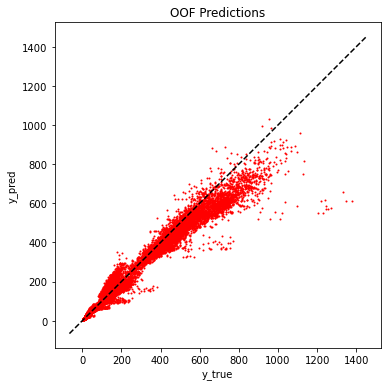

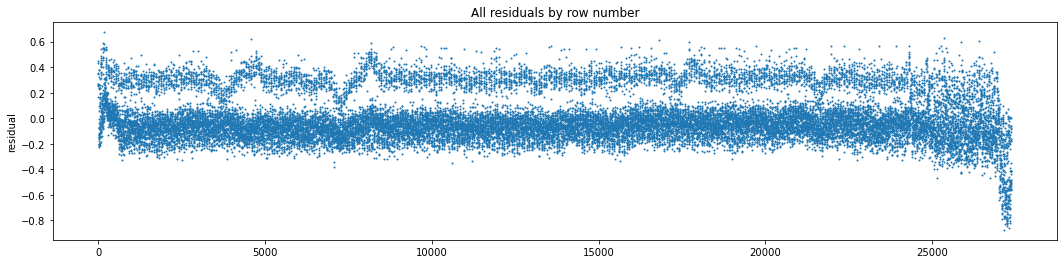

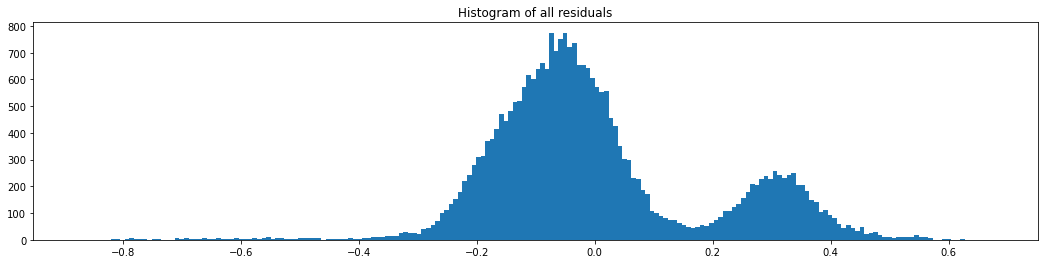

Standard deviation of log residuals: 0.184
Training on these years {2017, 2018}
Validating on these years {2021}
Fold 1 | 00:14 | SMAPE BC: 14.09600| SMAPE AC: 13.43540
Training on these years {2017, 2018, 2019}
Validating on these years {2021}
Fold 2 | 00:14 | SMAPE BC: 14.15150| SMAPE AC: 13.50920
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
Fold 3 | 00:15 | SMAPE BC: 14.24340| SMAPE AC: 13.72360


In [152]:
_, xgb_model = train_model('xgb', best_params, 'cv', True)

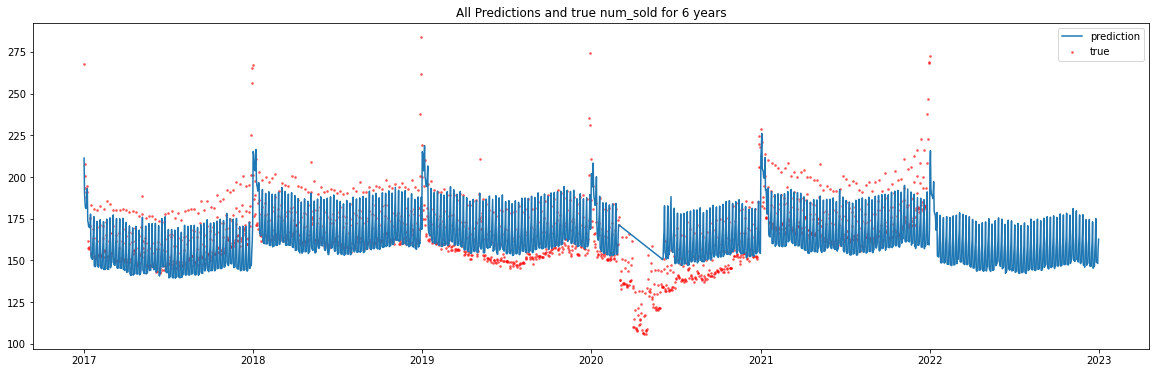

In [153]:
predict_plot(xgb_model,1)

### Submission

In [168]:
# make predictions
y_hat = np.exp(xgb_model.predict(test_eng[features]))
y_hat.round(0)

array([137., 143.,  21., ..., 121., 735., 699.], dtype=float32)

In [172]:
sub = pd.DataFrame(zip(test_eng.id,(y_hat/1.1).round()), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,125.0
1,136951,130.0
2,136952,19.0
3,136953,117.0
4,136954,111.0
...,...,...
27370,164320,695.0
27371,164321,739.0
27372,164322,110.0
27373,164323,668.0


In [173]:
sub.iloc[:151,:].mean()

id          137025.000000
num_sold       271.291382
dtype: float64

In [174]:
sub.to_csv('submissions/sub47.csv', index=False)

sub43: *1.15 9.97  
sub44: *1.2 10.0  
sub45: *1.13 10.2

SMAPE score using XGB is ~12. Sales are very much higher with ensemble models than linear regression. Suspecting a regime shift in private LB which tested predictions against data from April ~ December.

In [296]:
pd.read_csv('submissions/sub20.csv').iloc[:151,:]

,id,num_sold
0,136950,114.361020
1,136951,122.278130
2,136952,19.432741
3,136953,107.563675
4,136954,95.052380
...,...,...
146,137096,719.171450
147,137097,113.945160
148,137098,644.689400
149,137099,584.635700


## LightGBM Regressor

In [57]:
best_params = run_model('lgbm', 'group', 50)

[I 2023-07-31 13:43:11,596] A new study created in memory with name: no-name-d71872c5-dc9f-4e82-a9b8-81bba639091e


Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.011555784725947628. Current value: lambda_l2=0.011555784725947628
[LightGBM] [Warning] feature_fraction is set=0.8651166384383775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8651166384383775
[LightGBM] [Warning] bagging_fraction is set=0.9633800702744393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9633800702744393
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.011555784725947628. Current value: lambda_l2=0.011555784725947628
[LightGBM] [Warning] feature_fraction is set=0.8651166384383775, colsample_byt

Fold 1 | 00:02 | SMAPE BC: 5.72400| SMAPE AC: 5.72400
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:02 | SMAPE BC: 6.76470| SMAPE AC: 6.76470
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:03 | SMAPE BC: 6.05020| SMAPE AC: 6.05020
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:43:15,526] Trial 0 finished with value: 8.73082 and parameters: {'learning_rate': 0.10578471779203323, 'num_leaves': 40, 'max_depth': 4, 'min_child_samples': 4, 'feature_fraction': 0.8651166384383775, 'bagging_fraction': 0.9633800702744393, 'bagging_freq': 6, 'lambda': 0.011555784725947628, 'alpha': 0.00013469893699580515}. Best is trial 0 with value: 8.73082.


Fold 4 | 00:03 | SMAPE BC: 14.41690| SMAPE AC: 14.41690
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0360015145848565. Current value: lambda_l2=1.0360015145848565
[LightGBM] [Warning] feature_fraction is set=0.7687217889527836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7687217889527836
[LightGBM] [Warning] bagging_fraction is set=0.8054123971503813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8054123971503813
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0360015145848565. Current value: lambda_l2=1.0360015145848565
[LightGBM] [Warning] feature_f

[I 2023-07-31 13:43:20,220] Trial 1 finished with value: 7.617140000000001 and parameters: {'learning_rate': 0.1489352423784198, 'num_leaves': 58, 'max_depth': 10, 'min_child_samples': 20, 'feature_fraction': 0.7687217889527836, 'bagging_fraction': 0.8054123971503813, 'bagging_freq': 3, 'lambda': 1.0360015145848565, 'alpha': 0.8174588901401018}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:04 | SMAPE BC: 13.44530| SMAPE AC: 13.44530
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0036423507428075185. Current value: lambda_l2=0.0036423507428075185
[LightGBM] [Warning] feature_fraction is set=0.8233867248615653, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8233867248615653
[LightGBM] [Warning] bagging_fraction is set=0.6306971587908387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6306971587908387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0036423507428075185. Current value: lambda_l2=0.0036423507428075185
[LightGBM] [Warnin

[I 2023-07-31 13:43:23,946] Trial 2 finished with value: 20.99174 and parameters: {'learning_rate': 0.026271480369810703, 'num_leaves': 94, 'max_depth': 3, 'min_child_samples': 96, 'feature_fraction': 0.8233867248615653, 'bagging_fraction': 0.6306971587908387, 'bagging_freq': 2, 'lambda': 0.0036423507428075185, 'alpha': 0.0002982924392844776}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:03 | SMAPE BC: 26.80470| SMAPE AC: 26.80470
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.6504702271760491. Current value: lambda_l2=0.6504702271760491
[LightGBM] [Warning] feature_fraction is set=0.8548745475990304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8548745475990304
[LightGBM] [Warning] bagging_fraction is set=0.7131183895107428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7131183895107428
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.6504702271760491. Current value: lambda_l2=0.6504702271760491
[LightGBM] [Warning] feature_f

[I 2023-07-31 13:43:27,842] Trial 3 finished with value: 35.8408 and parameters: {'learning_rate': 0.0104737325914037, 'num_leaves': 71, 'max_depth': 9, 'min_child_samples': 65, 'feature_fraction': 0.8548745475990304, 'bagging_fraction': 0.7131183895107428, 'bagging_freq': 9, 'lambda': 0.6504702271760491, 'alpha': 0.0001621039094576905}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:03 | SMAPE BC: 40.62670| SMAPE AC: 40.62670
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0009678312485049799. Current value: lambda_l2=0.0009678312485049799
[LightGBM] [Warning] feature_fraction is set=0.8853047657971064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8853047657971064
[LightGBM] [Warning] bagging_fraction is set=0.6125242307019366, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6125242307019366
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0009678312485049799. Current value: lambda_l2=0.0009678312485049799
[LightGBM] [Warnin

[I 2023-07-31 13:43:31,233] Trial 4 finished with value: 12.974099999999998 and parameters: {'learning_rate': 0.04123217868238039, 'num_leaves': 12, 'max_depth': 9, 'min_child_samples': 37, 'feature_fraction': 0.8853047657971064, 'bagging_fraction': 0.6125242307019366, 'bagging_freq': 9, 'lambda': 0.0009678312485049799, 'alpha': 0.0005086454986018155}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:03 | SMAPE BC: 18.86120| SMAPE AC: 18.86120
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=6.75191748586013e-05. Current value: lambda_l2=6.75191748586013e-05
[LightGBM] [Warning] feature_fraction is set=0.6735798623287284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6735798623287284
[LightGBM] [Warning] bagging_fraction is set=0.6691012223118058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691012223118058
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with reg_l

Fold 3 | 00:03 | SMAPE BC: 5.47620| SMAPE AC: 5.47620
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:43:35,269] Trial 5 finished with value: 8.63398 and parameters: {'learning_rate': 0.12947140758719905, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 12, 'feature_fraction': 0.6735798623287284, 'bagging_fraction': 0.6691012223118058, 'bagging_freq': 3, 'lambda': 6.75191748586013e-05, 'alpha': 0.019768120482430138}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:04 | SMAPE BC: 14.47750| SMAPE AC: 14.47750
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.002547862144953631. Current value: lambda_l2=0.002547862144953631
[LightGBM] [Warning] feature_fraction is set=0.9188652126770804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9188652126770804
[LightGBM] [Warning] bagging_fraction is set=0.9732879986228483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9732879986228483
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.002547862144953631. Current value: lambda_l2=0.002547862144953631
[LightGBM] [Warning] f

[I 2023-07-31 13:43:38,853] Trial 6 finished with value: 38.877520000000004 and parameters: {'learning_rate': 0.011569914249610163, 'num_leaves': 100, 'max_depth': 3, 'min_child_samples': 39, 'feature_fraction': 0.9188652126770804, 'bagging_fraction': 0.9732879986228483, 'bagging_freq': 8, 'lambda': 0.002547862144953631, 'alpha': 1.2453593845102384e-05}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:03 | SMAPE BC: 42.56030| SMAPE AC: 42.56030
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=6.032888985613725e-05. Current value: lambda_l2=6.032888985613725e-05
[LightGBM] [Warning] feature_fraction is set=0.8581910463441522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8581910463441522
[LightGBM] [Warning] bagging_fraction is set=0.9483235464197879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9483235464197879
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=6.032888985613725e-05. Current value: lambda_l2=6.032888985613725e-05
[LightGBM] [Warn

[I 2023-07-31 13:43:43,007] Trial 7 finished with value: 8.218340000000001 and parameters: {'learning_rate': 0.164026785774843, 'num_leaves': 24, 'max_depth': 9, 'min_child_samples': 35, 'feature_fraction': 0.8581910463441522, 'bagging_fraction': 0.9483235464197879, 'bagging_freq': 10, 'lambda': 6.032888985613725e-05, 'alpha': 0.17529815496155615}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:04 | SMAPE BC: 14.59850| SMAPE AC: 14.59850
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00031009329881012107. Current value: lambda_l2=0.00031009329881012107
[LightGBM] [Warning] feature_fraction is set=0.7895317327670986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7895317327670986
[LightGBM] [Warning] bagging_fraction is set=0.7609680157302148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7609680157302148
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00031009329881012107. Current value: lambda_l2=0.00031009329881012107
[LightGBM] [Wa

[I 2023-07-31 13:43:46,535] Trial 8 finished with value: 26.43628 and parameters: {'learning_rate': 0.01748704072056379, 'num_leaves': 12, 'max_depth': 5, 'min_child_samples': 68, 'feature_fraction': 0.7895317327670986, 'bagging_fraction': 0.7609680157302148, 'bagging_freq': 8, 'lambda': 0.00031009329881012107, 'alpha': 7.408947507627301e-05}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:03 | SMAPE BC: 31.76690| SMAPE AC: 31.76690
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.017668198365483476. Current value: lambda_l2=0.017668198365483476
[LightGBM] [Warning] feature_fraction is set=0.7252314491097558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252314491097558
[LightGBM] [Warning] bagging_fraction is set=0.9130346066935637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9130346066935637
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.017668198365483476. Current value: lambda_l2=0.017668198365483476
[LightGBM] [Warning] f

[I 2023-07-31 13:43:51,361] Trial 9 finished with value: 14.668360000000002 and parameters: {'learning_rate': 0.026418084224465448, 'num_leaves': 88, 'max_depth': 9, 'min_child_samples': 23, 'feature_fraction': 0.7252314491097558, 'bagging_fraction': 0.9130346066935637, 'bagging_freq': 9, 'lambda': 0.017668198365483476, 'alpha': 0.022880473786521756}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:04 | SMAPE BC: 21.10760| SMAPE AC: 21.10760
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.48868429095409. Current value: lambda_l2=7.48868429095409
[LightGBM] [Warning] feature_fraction is set=0.9719906579435648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9719906579435648
[LightGBM] [Warning] bagging_fraction is set=0.8441661507704827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8441661507704827
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.48868429095409. Current value: lambda_l2=7.48868429095409
[LightGBM] [Warning] feature_fraction 

[I 2023-07-31 13:43:55,639] Trial 10 finished with value: 8.3193 and parameters: {'learning_rate': 0.08554946620871016, 'num_leaves': 53, 'max_depth': 7, 'min_child_samples': 59, 'feature_fraction': 0.9719906579435648, 'bagging_fraction': 0.8441661507704827, 'bagging_freq': 4, 'lambda': 7.48868429095409, 'alpha': 4.364098448204325}. Best is trial 1 with value: 7.617140000000001.


Fold 4 | 00:04 | SMAPE BC: 13.87910| SMAPE AC: 13.87910
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.00975139400315e-05. Current value: lambda_l2=1.00975139400315e-05
[LightGBM] [Warning] feature_fraction is set=0.7945047703534607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7945047703534607
[LightGBM] [Warning] bagging_fraction is set=0.8498462552659911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8498462552659911
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.00975139400315e-05. Current value: lambda_l2=1.00975139400315e-05
[LightGBM] [Warning] f

[I 2023-07-31 13:43:59,801] Trial 11 finished with value: 7.585199999999999 and parameters: {'learning_rate': 0.17831851077140307, 'num_leaves': 65, 'max_depth': 7, 'min_child_samples': 25, 'feature_fraction': 0.7945047703534607, 'bagging_fraction': 0.8498462552659911, 'bagging_freq': 1, 'lambda': 1.00975139400315e-05, 'alpha': 0.8633492941525241}. Best is trial 11 with value: 7.585199999999999.


Fold 4 | 00:04 | SMAPE BC: 12.60620| SMAPE AC: 12.60620
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.2377220821743594e-05. Current value: lambda_l2=2.2377220821743594e-05
[LightGBM] [Warning] feature_fraction is set=0.7752782965569452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7752782965569452
[LightGBM] [Warning] bagging_fraction is set=0.8298117300025586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8298117300025586
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.2377220821743594e-05. Current value: lambda_l2=2.2377220821743594e-05
[LightGBM] [Wa

[I 2023-07-31 13:44:03,936] Trial 12 finished with value: 8.16868 and parameters: {'learning_rate': 0.19247619779046243, 'num_leaves': 65, 'max_depth': 7, 'min_child_samples': 18, 'feature_fraction': 0.7752782965569452, 'bagging_fraction': 0.8298117300025586, 'bagging_freq': 1, 'lambda': 2.2377220821743594e-05, 'alpha': 2.3782861038186565}. Best is trial 11 with value: 7.585199999999999.


Fold 4 | 00:04 | SMAPE BC: 14.25780| SMAPE AC: 14.25780
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.13069857292206366. Current value: lambda_l2=0.13069857292206366
[LightGBM] [Warning] feature_fraction is set=0.6252164519117633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6252164519117633
[LightGBM] [Warning] bagging_fraction is set=0.7860597339012448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7860597339012448
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.13069857292206366. Current value: lambda_l2=0.13069857292206366
[LightGBM] [Warning] featu

[57]	valid_0's l1: 0.124979	valid_0's SMAPE: 3.1526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's l1: 0.123782	valid_0's SMAPE: 3.102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's l1: 0.122312	valid_0's SMAPE: 3.049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l1: 0.12112	valid_0's SMAPE: 3.0087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.120324	valid_0's SMAPE: 2.9825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.119112	valid_0's SMAPE: 2.9356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.11811	valid_0's SMAPE: 2.896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.117759	valid_0's SMAPE: 2.8863
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-07-31 13:44:08,486] Trial 13 finished with value: 8.84094 and parameters: {'learning_rate': 0.07309972860987721, 'num_leaves': 76, 'max_depth': 6, 'min_child_samples': 26, 'feature_fraction': 0.6252164519117633, 'bagging_fraction': 0.7860597339012448, 'bagging_freq': 1, 'lambda': 0.13069857292206366, 'alpha': 0.2812162622964856}. Best is trial 11 with value: 7.585199999999999.


Fold 4 | 00:04 | SMAPE BC: 16.03240| SMAPE AC: 16.03240
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.078774255161657e-05. Current value: lambda_l2=1.078774255161657e-05
[LightGBM] [Warning] feature_fraction is set=0.766192366537888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.766192366537888
[LightGBM] [Warning] bagging_fraction is set=0.8749029586898109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8749029586898109
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.078774255161657e-05. Current value: lambda_l2=1.078774255161657e-05
[LightGBM] [Warning]

[I 2023-07-31 13:44:13,041] Trial 14 finished with value: 7.9785200000000005 and parameters: {'learning_rate': 0.1957254091725663, 'num_leaves': 52, 'max_depth': 8, 'min_child_samples': 4, 'feature_fraction': 0.766192366537888, 'bagging_fraction': 0.8749029586898109, 'bagging_freq': 5, 'lambda': 1.078774255161657e-05, 'alpha': 0.6230261609147781}. Best is trial 11 with value: 7.585199999999999.


Fold 4 | 00:04 | SMAPE BC: 13.98200| SMAPE AC: 13.98200
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003133765153195512. Current value: lambda_l2=0.0003133765153195512
[LightGBM] [Warning] feature_fraction is set=0.7330257561189266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7330257561189266
[LightGBM] [Warning] bagging_fraction is set=0.7609610987243137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7609610987243137
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003133765153195512. Current value: lambda_l2=0.0003133765153195512
[LightGBM] [Warnin

[64]	valid_0's l1: 0.101559	valid_0's SMAPE: 2.4677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's l1: 0.101921	valid_0's SMAPE: 2.4767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.101964	valid_0's SMAPE: 2.4786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.101788	valid_0's SMAPE: 2.4751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's l1: 0.101487	valid_0's SMAPE: 2.4673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.101485	valid_0's SMAPE: 2.4682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.10139	valid_0's SMAPE: 2.4663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.101332	valid_0's SMAPE: 2.4666
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-07-31 13:44:17,486] Trial 15 finished with value: 7.5718000000000005 and parameters: {'learning_rate': 0.11670807703496033, 'num_leaves': 61, 'max_depth': 6, 'min_child_samples': 48, 'feature_fraction': 0.7330257561189266, 'bagging_fraction': 0.7609610987243137, 'bagging_freq': 3, 'lambda': 0.0003133765153195512, 'alpha': 0.06186034906242857}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:04 | SMAPE BC: 11.55050| SMAPE AC: 11.55050
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00017954890138895346. Current value: lambda_l2=0.00017954890138895346
[LightGBM] [Warning] feature_fraction is set=0.7155312528170489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7155312528170489
[LightGBM] [Warning] bagging_fraction is set=0.7482196539478944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7482196539478944
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00017954890138895346. Current value: lambda_l2=0.00017954890138895346
[LightGBM] [Wa

[57]	valid_0's l1: 0.122801	valid_0's SMAPE: 3.0788
[58]	valid_0's l1: 0.121347	valid_0's SMAPE: 3.0282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's l1: 0.119837	valid_0's SMAPE: 2.9787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l1: 0.118447	valid_0's SMAPE: 2.9309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.117002	valid_0's SMAPE: 2.8796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.115695	valid_0's SMAPE: 2.8347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.114654	valid_0's SMAPE: 2.7954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.113748	valid_0's SMAPE: 2.7667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's l1: 0.112744	valid_0's SMAPE: 2.7297
[LightG

[I 2023-07-31 13:44:21,769] Trial 16 finished with value: 8.316480000000002 and parameters: {'learning_rate': 0.06844149342207442, 'num_leaves': 81, 'max_depth': 6, 'min_child_samples': 49, 'feature_fraction': 0.7155312528170489, 'bagging_fraction': 0.7482196539478944, 'bagging_freq': 2, 'lambda': 0.00017954890138895346, 'alpha': 0.06133976984556036}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:04 | SMAPE BC: 13.36720| SMAPE AC: 13.36720
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003702029521276034. Current value: lambda_l2=0.0003702029521276034
[LightGBM] [Warning] feature_fraction is set=0.7185711699471926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7185711699471926
[LightGBM] [Warning] bagging_fraction is set=0.8647986792936583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647986792936583
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003702029521276034. Current value: lambda_l2=0.0003702029521276034
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.0966383	valid_0's SMAPE: 2.3081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's l1: 0.0965629	valid_0's SMAPE: 2.3129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.0964543	valid_0's SMAPE: 2.3145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.0960539	valid_0's SMAPE: 2.3068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's l1: 0.0957669	valid_0's SMAPE: 2.3024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.0958139	valid_0's SMAPE: 2.3049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.095859	valid_0's SMAPE: 2.3082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.095686	va

[I 2023-07-31 13:44:25,666] Trial 17 finished with value: 8.13722 and parameters: {'learning_rate': 0.11120867697485878, 'num_leaves': 43, 'max_depth': 5, 'min_child_samples': 84, 'feature_fraction': 0.7185711699471926, 'bagging_fraction': 0.8647986792936583, 'bagging_freq': 5, 'lambda': 0.0003702029521276034, 'alpha': 0.003294719160960269}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 13.46800| SMAPE AC: 13.46800
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.253033120566921e-05. Current value: lambda_l2=1.253033120566921e-05
[LightGBM] [Warning] feature_fraction is set=0.8206676739248858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8206676739248858
[LightGBM] [Warning] bagging_fraction is set=0.897946488534894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.897946488534894
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.253033120566921e-05. Current value: lambda_l2=1.253033120566921e-05
[LightGBM] [Warning]

[71]	valid_0's l1: 0.104042	valid_0's SMAPE: 2.5161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.103966	valid_0's SMAPE: 2.5151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.104114	valid_0's SMAPE: 2.5194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.104022	valid_0's SMAPE: 2.5176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.103979	valid_0's SMAPE: 2.517
[76]	valid_0's l1: 0.103931	valid_0's SMAPE: 2.5165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.103907	valid_0's SMAPE: 2.5177
[78]	valid_0's l1: 0.104033	valid_0's SMAPE: 2.521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.104095	valid_0's SMAPE: 2.523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid

[I 2023-07-31 13:44:29,791] Trial 18 finished with value: 8.19424 and parameters: {'learning_rate': 0.1263420216093429, 'num_leaves': 63, 'max_depth': 5, 'min_child_samples': 53, 'feature_fraction': 0.8206676739248858, 'bagging_fraction': 0.897946488534894, 'bagging_freq': 3, 'lambda': 1.253033120566921e-05, 'alpha': 0.11552737813488922}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:04 | SMAPE BC: 13.45010| SMAPE AC: 13.45010
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.456250781204257e-05. Current value: lambda_l2=4.456250781204257e-05
[LightGBM] [Warning] feature_fraction is set=0.6572519926871221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6572519926871221
[LightGBM] [Warning] bagging_fraction is set=0.810662272279323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.810662272279323
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.456250781204257e-05. Current value: lambda_l2=4.456250781204257e-05
[LightGBM] [Warning]

[I 2023-07-31 13:44:33,702] Trial 19 finished with value: 9.54022 and parameters: {'learning_rate': 0.05550684315267593, 'num_leaves': 46, 'max_depth': 7, 'min_child_samples': 75, 'feature_fraction': 0.6572519926871221, 'bagging_fraction': 0.810662272279323, 'bagging_freq': 1, 'lambda': 4.456250781204257e-05, 'alpha': 1.0594118359353495}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 16.66730| SMAPE AC: 16.66730
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00013660257503014388. Current value: lambda_l2=0.00013660257503014388
[LightGBM] [Warning] feature_fraction is set=0.6094915490137689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6094915490137689
[LightGBM] [Warning] bagging_fraction is set=0.7243828941583901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7243828941583901
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00013660257503014388. Current value: lambda_l2=0.00013660257503014388
[LightGBM] [Wa

[I 2023-07-31 13:44:37,945] Trial 20 finished with value: 9.240979999999999 and parameters: {'learning_rate': 0.08800769695850881, 'num_leaves': 80, 'max_depth': 8, 'min_child_samples': 47, 'feature_fraction': 0.6094915490137689, 'bagging_fraction': 0.7243828941583901, 'bagging_freq': 4, 'lambda': 0.00013660257503014388, 'alpha': 0.003740114313103104}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:04 | SMAPE BC: 17.45750| SMAPE AC: 17.45750
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0008078785070232709. Current value: lambda_l2=0.0008078785070232709
[LightGBM] [Warning] feature_fraction is set=0.7555241893605462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7555241893605462
[LightGBM] [Warning] bagging_fraction is set=0.7972748328300177, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7972748328300177
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0008078785070232709. Current value: lambda_l2=0.0008078785070232709
[LightGBM] [Warnin

[I 2023-07-31 13:44:42,019] Trial 21 finished with value: 7.627199999999999 and parameters: {'learning_rate': 0.14618212006940848, 'num_leaves': 61, 'max_depth': 10, 'min_child_samples': 30, 'feature_fraction': 0.7555241893605462, 'bagging_fraction': 0.7972748328300177, 'bagging_freq': 3, 'lambda': 0.0008078785070232709, 'alpha': 0.48626562596047157}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 13.27880| SMAPE AC: 13.27880
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0496020014885185. Current value: lambda_l2=0.0496020014885185
[LightGBM] [Warning] feature_fraction is set=0.8085321821929005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8085321821929005
[LightGBM] [Warning] bagging_fraction is set=0.8379492790638491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8379492790638491
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0496020014885185. Current value: lambda_l2=0.0496020014885185
[LightGBM] [Warning] feature_f

[I 2023-07-31 13:44:46,077] Trial 22 finished with value: 8.06804 and parameters: {'learning_rate': 0.15805567213693683, 'num_leaves': 68, 'max_depth': 8, 'min_child_samples': 15, 'feature_fraction': 0.8085321821929005, 'bagging_fraction': 0.8379492790638491, 'bagging_freq': 2, 'lambda': 0.0496020014885185, 'alpha': 0.9606109937434437}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 14.17360| SMAPE AC: 14.17360
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.492108569402082e-05. Current value: lambda_l2=3.492108569402082e-05
[LightGBM] [Warning] feature_fraction is set=0.7420850522342928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420850522342928
[LightGBM] [Warning] bagging_fraction is set=0.7818977851483248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7818977851483248
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.492108569402082e-05. Current value: lambda_l2=3.492108569402082e-05
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.103588	valid_0's SMAPE: 2.4985
[68]	valid_0's l1: 0.103594	valid_0's SMAPE: 2.4977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.103536	valid_0's SMAPE: 2.4967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.103558	valid_0's SMAPE: 2.4991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.103578	valid_0's SMAPE: 2.5002
[72]	valid_0's l1: 0.103512	valid_0's SMAPE: 2.4991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.103349	valid_0's SMAPE: 2.4968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.103283	valid_0's SMAPE: 2.496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.103124	valid_0's SMAPE: 2.4934
[LightGB

[I 2023-07-31 13:44:49,927] Trial 23 finished with value: 7.898660000000001 and parameters: {'learning_rate': 0.108037034962908, 'num_leaves': 58, 'max_depth': 6, 'min_child_samples': 42, 'feature_fraction': 0.7420850522342928, 'bagging_fraction': 0.7818977851483248, 'bagging_freq': 6, 'lambda': 3.492108569402082e-05, 'alpha': 1.9519971130833675}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 12.73040| SMAPE AC: 12.73040
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0371536105268812e-05. Current value: lambda_l2=1.0371536105268812e-05
[LightGBM] [Warning] feature_fraction is set=0.7812081582103091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812081582103091
[LightGBM] [Warning] bagging_fraction is set=0.8081073464623557, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8081073464623557
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0371536105268812e-05. Current value: lambda_l2=1.0371536105268812e-05
[LightGBM] [Wa

Fold 0 | 00:01 | SMAPE BC: 10.07890| SMAPE AC: 10.07890
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:02 | SMAPE BC: 5.51630| SMAPE AC: 5.51630
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:02 | SMAPE BC: 6.76760| SMAPE AC: 6.76760
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:03 | SMAPE BC: 5.87420| SMAPE AC: 5.87420
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:44:53,595] Trial 24 finished with value: 8.26438 and parameters: {'learning_rate': 0.19821816698962455, 'num_leaves': 51, 'max_depth': 4, 'min_child_samples': 29, 'feature_fraction': 0.7812081582103091, 'bagging_fraction': 0.8081073464623557, 'bagging_freq': 4, 'lambda': 1.0371536105268812e-05, 'alpha': 0.21914219462041584}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 13.08490| SMAPE AC: 13.08490
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.81917617456075e-05. Current value: lambda_l2=9.81917617456075e-05
[LightGBM] [Warning] feature_fraction is set=0.6985477037726306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6985477037726306
[LightGBM] [Warning] bagging_fraction is set=0.7657574154629587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7657574154629587
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.81917617456075e-05. Current value: lambda_l2=9.81917617456075e-05
[LightGBM] [Warning] f

[I 2023-07-31 13:44:57,423] Trial 25 finished with value: 8.247440000000001 and parameters: {'learning_rate': 0.1447790697872335, 'num_leaves': 35, 'max_depth': 10, 'min_child_samples': 9, 'feature_fraction': 0.6985477037726306, 'bagging_fraction': 0.7657574154629587, 'bagging_freq': 2, 'lambda': 9.81917617456075e-05, 'alpha': 4.324016305222714}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 15.26500| SMAPE AC: 15.26500
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.003865796126288493. Current value: lambda_l2=0.003865796126288493
[LightGBM] [Warning] feature_fraction is set=0.7548323439404291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7548323439404291
[LightGBM] [Warning] bagging_fraction is set=0.8162235484439274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8162235484439274
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.003865796126288493. Current value: lambda_l2=0.003865796126288493
[LightGBM] [Warning] f

[I 2023-07-31 13:45:01,542] Trial 26 finished with value: 7.91662 and parameters: {'learning_rate': 0.0973066272464437, 'num_leaves': 73, 'max_depth': 8, 'min_child_samples': 18, 'feature_fraction': 0.7548323439404291, 'bagging_fraction': 0.8162235484439274, 'bagging_freq': 3, 'lambda': 0.003865796126288493, 'alpha': 0.0663595413774694}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:04 | SMAPE BC: 13.28500| SMAPE AC: 13.28500
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0006420421387404535. Current value: lambda_l2=0.0006420421387404535
[LightGBM] [Warning] feature_fraction is set=0.7934731557431242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7934731557431242
[LightGBM] [Warning] bagging_fraction is set=0.8413630131367917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413630131367917
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0006420421387404535. Current value: lambda_l2=0.0006420421387404535
[LightGBM] [Warnin

Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:01 | SMAPE BC: 5.79920| SMAPE AC: 5.79920
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:02 | SMAPE BC: 6.92310| SMAPE AC: 6.92310
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:02 | SMAPE BC: 6.02490| SMAPE AC: 6.02490
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:45:04,924] Trial 27 finished with value: 8.45146 and parameters: {'learning_rate': 0.13032766061790577, 'num_leaves': 57, 'max_depth': 4, 'min_child_samples': 54, 'feature_fraction': 0.7934731557431242, 'bagging_fraction': 0.8413630131367917, 'bagging_freq': 1, 'lambda': 0.0006420421387404535, 'alpha': 0.48980902060069686}. Best is trial 15 with value: 7.5718000000000005.


Fold 4 | 00:03 | SMAPE BC: 13.45000| SMAPE AC: 13.45000
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00012671868234114843. Current value: lambda_l2=0.00012671868234114843
[LightGBM] [Warning] feature_fraction is set=0.733314677185724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.733314677185724
[LightGBM] [Warning] bagging_fraction is set=0.7211387381896899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7211387381896899
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00012671868234114843. Current value: lambda_l2=0.00012671868234114843
[LightGBM] [Warn

Fold 0 | 00:01 | SMAPE BC: 9.82160| SMAPE AC: 9.82160
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:02 | SMAPE BC: 4.86850| SMAPE AC: 4.86850
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:02 | SMAPE BC: 5.61430| SMAPE AC: 5.61430
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:03 | SMAPE BC: 4.90720| SMAPE AC: 4.90720
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:45:08,899] Trial 28 finished with value: 7.4031400000000005 and parameters: {'learning_rate': 0.16067970833941994, 'num_leaves': 84, 'max_depth': 7, 'min_child_samples': 22, 'feature_fraction': 0.733314677185724, 'bagging_fraction': 0.7211387381896899, 'bagging_freq': 4, 'lambda': 0.00012671868234114843, 'alpha': 0.3258077398246908}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 11.80410| SMAPE AC: 11.80410
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.1172999903630854e-05. Current value: lambda_l2=3.1172999903630854e-05
[LightGBM] [Warning] feature_fraction is set=0.6868290030250179, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6868290030250179
[LightGBM] [Warning] bagging_fraction is set=0.703681444884085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703681444884085
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.1172999903630854e-05. Current value: lambda_l2=3.1172999903630854e-05
[LightGBM] [Warn

[86]	valid_0's l1: 0.0988551	valid_0's SMAPE: 2.3843
[87]	valid_0's l1: 0.0988161	valid_0's SMAPE: 2.3832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	valid_0's l1: 0.0987961	valid_0's SMAPE: 2.3829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's l1: 0.0987314	valid_0's SMAPE: 2.3814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 0.0987041	valid_0's SMAPE: 2.3809
[91]	valid_0's l1: 0.0986585	valid_0's SMAPE: 2.3799
[92]	valid_0's l1: 0.0986412	valid_0's SMAPE: 2.3794
[93]	valid_0's l1: 0.0987237	valid_0's SMAPE: 2.3813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's l1: 0.0987181	valid_0's SMAPE: 2.3812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's l1: 0.0986999	valid_0's SMAPE: 2.381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's l1: 0.

[I 2023-07-31 13:45:12,915] Trial 29 finished with value: 7.978140000000001 and parameters: {'learning_rate': 0.11550125671537376, 'num_leaves': 86, 'max_depth': 7, 'min_child_samples': 31, 'feature_fraction': 0.6868290030250179, 'bagging_fraction': 0.703681444884085, 'bagging_freq': 5, 'lambda': 3.1172999903630854e-05, 'alpha': 0.09288983314577043}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 14.11500| SMAPE AC: 14.11500
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00013976896746313946. Current value: lambda_l2=0.00013976896746313946
[LightGBM] [Warning] feature_fraction is set=0.7410009395082863, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7410009395082863
[LightGBM] [Warning] bagging_fraction is set=0.7433075575579995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7433075575579995
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00013976896746313946. Current value: lambda_l2=0.00013976896746313946
[LightGBM] [Wa

[50]	valid_0's l1: 0.105577	valid_0's SMAPE: 2.5231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.104896	valid_0's SMAPE: 2.5084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.104337	valid_0's SMAPE: 2.4976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.103901	valid_0's SMAPE: 2.484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.103265	valid_0's SMAPE: 2.463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.102947	valid_0's SMAPE: 2.4569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.103026	valid_0's SMAPE: 2.4552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.102459	valid_0's SMAPE: 2.4381
[LightGBM] [Warning] No further splits with positive gain, be

[I 2023-07-31 13:45:16,803] Trial 30 finished with value: 7.6098799999999995 and parameters: {'learning_rate': 0.10300609485909089, 'num_leaves': 88, 'max_depth': 6, 'min_child_samples': 47, 'feature_fraction': 0.7410009395082863, 'bagging_fraction': 0.7433075575579995, 'bagging_freq': 7, 'lambda': 0.00013976896746313946, 'alpha': 0.28825545998153124}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 11.44600| SMAPE AC: 11.44600
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001847992903783757. Current value: lambda_l2=0.0001847992903783757
[LightGBM] [Warning] feature_fraction is set=0.7411074646800011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7411074646800011
[LightGBM] [Warning] bagging_fraction is set=0.7336058897879753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7336058897879753
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001847992903783757. Current value: lambda_l2=0.0001847992903783757
[LightGBM] [Warnin

[50]	valid_0's l1: 0.102903	valid_0's SMAPE: 2.5214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.102083	valid_0's SMAPE: 2.5012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.101669	valid_0's SMAPE: 2.4792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.100791	valid_0's SMAPE: 2.4479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.100344	valid_0's SMAPE: 2.437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.0997894	valid_0's SMAPE: 2.4236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.0996988	valid_0's SMAPE: 2.4155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.0992946	valid_0's SMAPE: 2.4007
[LightGBM] [Warning] No further splits with positive gain

[I 2023-07-31 13:45:20,624] Trial 31 finished with value: 7.73218 and parameters: {'learning_rate': 0.0980076840604006, 'num_leaves': 88, 'max_depth': 6, 'min_child_samples': 44, 'feature_fraction': 0.7411074646800011, 'bagging_fraction': 0.7336058897879753, 'bagging_freq': 7, 'lambda': 0.0001847992903783757, 'alpha': 0.2767420547169276}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.16330| SMAPE AC: 12.16330
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001045047385126729. Current value: lambda_l2=0.0001045047385126729
[LightGBM] [Warning] feature_fraction is set=0.7059381385662321, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7059381385662321
[LightGBM] [Warning] bagging_fraction is set=0.6955369577535065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955369577535065
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001045047385126729. Current value: lambda_l2=0.0001045047385126729
[LightGBM] [Warnin

[88]	valid_0's l1: 0.09012	valid_0's SMAPE: 2.2104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's l1: 0.0900944	valid_0's SMAPE: 2.21
[90]	valid_0's l1: 0.090048	valid_0's SMAPE: 2.209
[91]	valid_0's l1: 0.0901494	valid_0's SMAPE: 2.2114
[92]	valid_0's l1: 0.0901026	valid_0's SMAPE: 2.2104
[93]	valid_0's l1: 0.0900025	valid_0's SMAPE: 2.2074
[94]	valid_0's l1: 0.0900444	valid_0's SMAPE: 2.2084
[95]	valid_0's l1: 0.0901566	valid_0's SMAPE: 2.2111
[96]	valid_0's l1: 0.0901299	valid_0's SMAPE: 2.2106
[97]	valid_0's l1: 0.0900607	valid_0's SMAPE: 2.209
[98]	valid_0's l1: 0.0900071	valid_0's SMAPE: 2.2078
[99]	valid_0's l1: 0.0899469	valid_0's SMAPE: 2.2066
[100]	valid_0's l1: 0.0898626	valid_0's SMAPE: 2.2048
Fold 0 | 00:01 | SMAPE BC: 8.96760| SMAPE AC: 8.96760
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:02 | SMAPE BC: 5.35410| SMAPE AC: 5.35410
Training on these years {2017, 2019, 2020, 2021}
Val

[I 2023-07-31 13:45:24,178] Trial 32 finished with value: 7.75356 and parameters: {'learning_rate': 0.16735455809271926, 'num_leaves': 96, 'max_depth': 5, 'min_child_samples': 3, 'feature_fraction': 0.7059381385662321, 'bagging_fraction': 0.6955369577535065, 'bagging_freq': 7, 'lambda': 0.0001045047385126729, 'alpha': 0.04326581128416046}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.90340| SMAPE AC: 12.90340
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.4561053882660084e-05. Current value: lambda_l2=2.4561053882660084e-05
[LightGBM] [Warning] feature_fraction is set=0.744634471412295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.744634471412295
[LightGBM] [Warning] bagging_fraction is set=0.7550962700418506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550962700418506
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.4561053882660084e-05. Current value: lambda_l2=2.4561053882660084e-05
[LightGBM] [Warn

[49]	valid_0's l1: 0.10257	valid_0's SMAPE: 2.5126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 0.102469	valid_0's SMAPE: 2.5111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.102169	valid_0's SMAPE: 2.5059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.101677	valid_0's SMAPE: 2.4917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.101504	valid_0's SMAPE: 2.4883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.101412	valid_0's SMAPE: 2.4873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.101227	valid_0's SMAPE: 2.4837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.101193	valid_0's SMAPE: 2.4839
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-07-31 13:45:28,012] Trial 33 finished with value: 7.67988 and parameters: {'learning_rate': 0.12716512493344798, 'num_leaves': 79, 'max_depth': 6, 'min_child_samples': 58, 'feature_fraction': 0.744634471412295, 'bagging_fraction': 0.7550962700418506, 'bagging_freq': 6, 'lambda': 2.4561053882660084e-05, 'alpha': 0.16773689703420716}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 11.96780| SMAPE AC: 11.96780
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003816894930570601. Current value: lambda_l2=0.0003816894930570601
[LightGBM] [Warning] feature_fraction is set=0.8367200648452023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8367200648452023
[LightGBM] [Warning] bagging_fraction is set=0.6720226731451159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6720226731451159
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003816894930570601. Current value: lambda_l2=0.0003816894930570601
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.103168	valid_0's SMAPE: 2.5243
[73]	valid_0's l1: 0.103088	valid_0's SMAPE: 2.5225
[74]	valid_0's l1: 0.103089	valid_0's SMAPE: 2.5226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.10305	valid_0's SMAPE: 2.522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.103051	valid_0's SMAPE: 2.5222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.102986	valid_0's SMAPE: 2.5207
[78]	valid_0's l1: 0.103038	valid_0's SMAPE: 2.5234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.103007	valid_0's SMAPE: 2.523
[80]	valid_0's l1: 0.103159	valid_0's SMAPE: 2.5265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0.103153	valid_0's SMAPE: 2.5264
[LightGBM] [Warning] No further s

[I 2023-07-31 13:45:32,065] Trial 34 finished with value: 7.801219999999999 and parameters: {'learning_rate': 0.15253681974762434, 'num_leaves': 69, 'max_depth': 7, 'min_child_samples': 100, 'feature_fraction': 0.8367200648452023, 'bagging_fraction': 0.6720226731451159, 'bagging_freq': 4, 'lambda': 0.0003816894930570601, 'alpha': 0.416402019258283}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.75060| SMAPE AC: 12.75060
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0015883668068317673. Current value: lambda_l2=0.0015883668068317673
[LightGBM] [Warning] feature_fraction is set=0.8101421886210468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8101421886210468
[LightGBM] [Warning] bagging_fraction is set=0.7360315383452067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7360315383452067
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0015883668068317673. Current value: lambda_l2=0.0015883668068317673
[LightGBM] [Warnin

[55]	valid_0's l1: 0.0994244	valid_0's SMAPE: 2.3858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.0992173	valid_0's SMAPE: 2.3824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.0991076	valid_0's SMAPE: 2.3802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's l1: 0.0989163	valid_0's SMAPE: 2.3745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's l1: 0.0985703	valid_0's SMAPE: 2.3677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l1: 0.0983262	valid_0's SMAPE: 2.3631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.0984936	valid_0's SMAPE: 2.3668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.0983292	valid_0's SMAPE: 2.3608
[LightGBM] [Warning] No further splits with positiv

[I 2023-07-31 13:45:36,130] Trial 35 finished with value: 7.6703 and parameters: {'learning_rate': 0.10536893067494771, 'num_leaves': 92, 'max_depth': 6, 'min_child_samples': 23, 'feature_fraction': 0.8101421886210468, 'bagging_fraction': 0.7360315383452067, 'bagging_freq': 7, 'lambda': 0.0015883668068317673, 'alpha': 1.1647121539685872}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.41380| SMAPE AC: 12.41380
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.516902523358287e-05. Current value: lambda_l2=7.516902523358287e-05
[LightGBM] [Warning] feature_fraction is set=0.7290753786527194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7290753786527194
[LightGBM] [Warning] bagging_fraction is set=0.7730767524068345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7730767524068345
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.516902523358287e-05. Current value: lambda_l2=7.516902523358287e-05
[LightGBM] [Warnin

[96]	valid_0's l1: 0.100868	valid_0's SMAPE: 2.55
[97]	valid_0's l1: 0.100835	valid_0's SMAPE: 2.5491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	valid_0's l1: 0.100733	valid_0's SMAPE: 2.5465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	valid_0's l1: 0.100736	valid_0's SMAPE: 2.5466
[100]	valid_0's l1: 0.100741	valid_0's SMAPE: 2.5466
Fold 0 | 00:02 | SMAPE BC: 10.04800| SMAPE AC: 10.04800
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:02 | SMAPE BC: 4.81870| SMAPE AC: 4.81870
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:03 | SMAPE BC: 5.51230| SMAPE AC: 5.51230
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:03 | SMAPE BC: 4.99760| SMAPE AC: 4.99760
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}


[I 2023-07-31 13:45:40,286] Trial 36 finished with value: 7.6578599999999994 and parameters: {'learning_rate': 0.1704059490089686, 'num_leaves': 74, 'max_depth': 7, 'min_child_samples': 33, 'feature_fraction': 0.7290753786527194, 'bagging_fraction': 0.7730767524068345, 'bagging_freq': 2, 'lambda': 7.516902523358287e-05, 'alpha': 0.1330019529870997}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:04 | SMAPE BC: 12.91270| SMAPE AC: 12.91270
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002382977738836605. Current value: lambda_l2=0.0002382977738836605
[LightGBM] [Warning] feature_fraction is set=0.7709346974102671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7709346974102671
[LightGBM] [Warning] bagging_fraction is set=0.7826659958546393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7826659958546393
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002382977738836605. Current value: lambda_l2=0.0002382977738836605
[LightGBM] [Warnin

[59]	valid_0's l1: 0.104756	valid_0's SMAPE: 2.5873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l1: 0.104626	valid_0's SMAPE: 2.5855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.104594	valid_0's SMAPE: 2.588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.104433	valid_0's SMAPE: 2.5846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.104449	valid_0's SMAPE: 2.5864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.104431	valid_0's SMAPE: 2.5872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's l1: 0.104334	valid_0's SMAPE: 2.5858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.104181	valid_0's SMAPE: 2.5834
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-07-31 13:45:43,897] Trial 37 finished with value: 8.08044 and parameters: {'learning_rate': 0.13582621374043366, 'num_leaves': 100, 'max_depth': 5, 'min_child_samples': 66, 'feature_fraction': 0.7709346974102671, 'bagging_fraction': 0.7826659958546393, 'bagging_freq': 5, 'lambda': 0.0002382977738836605, 'alpha': 1.5682181711057133}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.80120| SMAPE AC: 12.80120
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=5.071832714956143e-05. Current value: lambda_l2=5.071832714956143e-05
[LightGBM] [Warning] feature_fraction is set=0.6744535231513474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6744535231513474
[LightGBM] [Warning] bagging_fraction is set=0.7155459211936291, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7155459211936291
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=5.071832714956143e-05. Current value: lambda_l2=5.071832714956143e-05
[LightGBM] [Warnin

[I 2023-07-31 13:45:48,072] Trial 38 finished with value: 8.68234 and parameters: {'learning_rate': 0.08280356453944301, 'num_leaves': 84, 'max_depth': 8, 'min_child_samples': 39, 'feature_fraction': 0.6744535231513474, 'bagging_fraction': 0.7155459211936291, 'bagging_freq': 4, 'lambda': 5.071832714956143e-05, 'alpha': 0.023787557524389037}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:04 | SMAPE BC: 15.14330| SMAPE AC: 15.14330
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.001542176610115378. Current value: lambda_l2=0.001542176610115378
[LightGBM] [Warning] feature_fraction is set=0.8002394138947997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8002394138947997
[LightGBM] [Warning] bagging_fraction is set=0.746180370395352, subsample=1.0 will be ignored. Current value: bagging_fraction=0.746180370395352
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.001542176610115378. Current value: lambda_l2=0.001542176610115378
[LightGBM] [Warning] fea

[50]	valid_0's l1: 0.11218	valid_0's SMAPE: 2.7284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.11182	valid_0's SMAPE: 2.7227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.111681	valid_0's SMAPE: 2.7236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.111505	valid_0's SMAPE: 2.7213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.111071	valid_0's SMAPE: 2.713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.110922	valid_0's SMAPE: 2.712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.111467	valid_0's SMAPE: 2.7301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.111368	valid_0's SMAPE: 2.7293
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-07-31 13:45:51,783] Trial 39 finished with value: 8.0798 and parameters: {'learning_rate': 0.11302105414790284, 'num_leaves': 67, 'max_depth': 6, 'min_child_samples': 73, 'feature_fraction': 0.8002394138947997, 'bagging_fraction': 0.746180370395352, 'bagging_freq': 8, 'lambda': 0.001542176610115378, 'alpha': 0.5912888012002442}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.49390| SMAPE AC: 12.49390
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.000487309593230395. Current value: lambda_l2=0.000487309593230395
[LightGBM] [Warning] feature_fraction is set=0.8455179759292818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8455179759292818
[LightGBM] [Warning] bagging_fraction is set=0.6371599859286758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6371599859286758
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.000487309593230395. Current value: lambda_l2=0.000487309593230395
[LightGBM] [Warning] f

[66]	valid_0's l1: 0.103573	valid_0's SMAPE: 2.6117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.10355	valid_0's SMAPE: 2.6113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's l1: 0.103507	valid_0's SMAPE: 2.6105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.10344	valid_0's SMAPE: 2.6087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.10341	valid_0's SMAPE: 2.6082
[71]	valid_0's l1: 0.103239	valid_0's SMAPE: 2.604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.103152	valid_0's SMAPE: 2.6019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.103074	valid_0's SMAPE: 2.6005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.102854	valid_0's SMAPE: 2.5948
[LightGBM] 

[I 2023-07-31 13:45:55,775] Trial 40 finished with value: 7.733140000000001 and parameters: {'learning_rate': 0.1700637215599912, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 45, 'feature_fraction': 0.8455179759292818, 'bagging_fraction': 0.6371599859286758, 'bagging_freq': 3, 'lambda': 0.000487309593230395, 'alpha': 0.29405504073625943}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 13.18070| SMAPE AC: 13.18070
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.003799000125661754. Current value: lambda_l2=0.003799000125661754
[LightGBM] [Warning] feature_fraction is set=0.781836078391078, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781836078391078
[LightGBM] [Warning] bagging_fraction is set=0.7589065091762454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7589065091762454
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.003799000125661754. Current value: lambda_l2=0.003799000125661754
[LightGBM] [Warning] fea

[I 2023-07-31 13:45:59,189] Trial 41 finished with value: 8.9884 and parameters: {'learning_rate': 0.13435277763882916, 'num_leaves': 60, 'max_depth': 3, 'min_child_samples': 11, 'feature_fraction': 0.781836078391078, 'bagging_fraction': 0.7589065091762454, 'bagging_freq': 3, 'lambda': 0.003799000125661754, 'alpha': 0.9166187751912712}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.34950| SMAPE AC: 12.34950
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00010432086880642492. Current value: lambda_l2=0.00010432086880642492
[LightGBM] [Warning] feature_fraction is set=0.7334050221528146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7334050221528146
[LightGBM] [Warning] bagging_fraction is set=0.8027077560457464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8027077560457464
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00010432086880642492. Current value: lambda_l2=0.00010432086880642492
[LightGBM] [Wa

[I 2023-07-31 13:46:03,347] Trial 42 finished with value: 7.426599999999999 and parameters: {'learning_rate': 0.1710195332524766, 'num_leaves': 48, 'max_depth': 9, 'min_child_samples': 21, 'feature_fraction': 0.7334050221528146, 'bagging_fraction': 0.8027077560457464, 'bagging_freq': 2, 'lambda': 0.00010432086880642492, 'alpha': 2.7581069560194584}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:04 | SMAPE BC: 13.11440| SMAPE AC: 13.11440
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001069798018858305. Current value: lambda_l2=0.0001069798018858305
[LightGBM] [Warning] feature_fraction is set=0.7261032421955951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7261032421955951
[LightGBM] [Warning] bagging_fraction is set=0.791416886022988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791416886022988
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0001069798018858305. Current value: lambda_l2=0.0001069798018858305
[LightGBM] [Warning]

[I 2023-07-31 13:46:07,186] Trial 43 finished with value: 7.497200000000001 and parameters: {'learning_rate': 0.17737456184854444, 'num_leaves': 35, 'max_depth': 9, 'min_child_samples': 23, 'feature_fraction': 0.7261032421955951, 'bagging_fraction': 0.791416886022988, 'bagging_freq': 2, 'lambda': 0.0001069798018858305, 'alpha': 2.4321183644890256}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.56250| SMAPE AC: 12.56250
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.191123326918616e-05. Current value: lambda_l2=7.191123326918616e-05
[LightGBM] [Warning] feature_fraction is set=0.7079075859203009, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7079075859203009
[LightGBM] [Warning] bagging_fraction is set=0.7878962569027718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7878962569027718
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=7.191123326918616e-05. Current value: lambda_l2=7.191123326918616e-05
[LightGBM] [Warnin

[I 2023-07-31 13:46:10,898] Trial 44 finished with value: 8.043140000000001 and parameters: {'learning_rate': 0.17994507472077365, 'num_leaves': 22, 'max_depth': 9, 'min_child_samples': 21, 'feature_fraction': 0.7079075859203009, 'bagging_fraction': 0.7878962569027718, 'bagging_freq': 2, 'lambda': 7.191123326918616e-05, 'alpha': 2.6745002109885254}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 13.99160| SMAPE AC: 13.99160
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002702756752124646. Current value: lambda_l2=0.0002702756752124646
[LightGBM] [Warning] feature_fraction is set=0.7228398809452752, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7228398809452752
[LightGBM] [Warning] bagging_fraction is set=0.8227521443482388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8227521443482388
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002702756752124646. Current value: lambda_l2=0.0002702756752124646
[LightGBM] [Warnin

[I 2023-07-31 13:46:14,433] Trial 45 finished with value: 7.452800000000001 and parameters: {'learning_rate': 0.19105151453139135, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 27, 'feature_fraction': 0.7228398809452752, 'bagging_fraction': 0.8227521443482388, 'bagging_freq': 1, 'lambda': 0.0002702756752124646, 'alpha': 2.825127672277957}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.25850| SMAPE AC: 12.25850
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002717585121773986. Current value: lambda_l2=0.0002717585121773986
[LightGBM] [Warning] feature_fraction is set=0.6916407852096095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6916407852096095
[LightGBM] [Warning] bagging_fraction is set=0.8213806372558002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8213806372558002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002717585121773986. Current value: lambda_l2=0.0002717585121773986
[LightGBM] [Warnin

[I 2023-07-31 13:46:18,372] Trial 46 finished with value: 8.00606 and parameters: {'learning_rate': 0.15683838494838284, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 8, 'feature_fraction': 0.6916407852096095, 'bagging_fraction': 0.8213806372558002, 'bagging_freq': 2, 'lambda': 0.0002717585121773986, 'alpha': 3.427870897695118}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 14.47500| SMAPE AC: 14.47500
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0007387675052112493. Current value: lambda_l2=0.0007387675052112493
[LightGBM] [Warning] feature_fraction is set=0.7179507781477363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7179507781477363
[LightGBM] [Warning] bagging_fraction is set=0.798946758645888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.798946758645888
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0007387675052112493. Current value: lambda_l2=0.0007387675052112493
[LightGBM] [Warning]

[I 2023-07-31 13:46:21,969] Trial 47 finished with value: 7.597460000000001 and parameters: {'learning_rate': 0.18758139174915914, 'num_leaves': 28, 'max_depth': 9, 'min_child_samples': 16, 'feature_fraction': 0.7179507781477363, 'bagging_fraction': 0.798946758645888, 'bagging_freq': 1, 'lambda': 0.0007387675052112493, 'alpha': 4.555210454015896}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 13.24200| SMAPE AC: 13.24200
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002392681859619607. Current value: lambda_l2=0.0002392681859619607
[LightGBM] [Warning] feature_fraction is set=0.7265551071295074, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265551071295074
[LightGBM] [Warning] bagging_fraction is set=0.826483140316862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.826483140316862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0002392681859619607. Current value: lambda_l2=0.0002392681859619607
[LightGBM] [Warning]

[I 2023-07-31 13:46:25,899] Trial 48 finished with value: 7.42892 and parameters: {'learning_rate': 0.1453937232927013, 'num_leaves': 47, 'max_depth': 10, 'min_child_samples': 37, 'feature_fraction': 0.7265551071295074, 'bagging_fraction': 0.826483140316862, 'bagging_freq': 3, 'lambda': 0.0002392681859619607, 'alpha': 1.6615883589563856}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 12.55940| SMAPE AC: 12.55940
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00011368269550183969. Current value: lambda_l2=0.00011368269550183969
[LightGBM] [Warning] feature_fraction is set=0.7606073316824526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7606073316824526
[LightGBM] [Warning] bagging_fraction is set=0.828979665224258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.828979665224258
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00011368269550183969. Current value: lambda_l2=0.00011368269550183969
[LightGBM] [Warn

[I 2023-07-31 13:46:29,633] Trial 49 finished with value: 7.7792200000000005 and parameters: {'learning_rate': 0.14629828656176078, 'num_leaves': 47, 'max_depth': 10, 'min_child_samples': 35, 'feature_fraction': 0.7606073316824526, 'bagging_fraction': 0.828979665224258, 'bagging_freq': 1, 'lambda': 0.00011368269550183969, 'alpha': 1.8476313380570215}. Best is trial 28 with value: 7.4031400000000005.


Fold 4 | 00:03 | SMAPE BC: 13.42850| SMAPE AC: 13.42850
The best parameters are: {'learning_rate': 0.16067970833941994, 'num_leaves': 84, 'max_depth': 7, 'min_child_samples': 22, 'feature_fraction': 0.733314677185724, 'bagging_fraction': 0.7211387381896899, 'bagging_freq': 4, 'lambda': 0.00012671868234114843, 'alpha': 0.3258077398246908}
The best SMAPE is: 7.4031400000000005


Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2021}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00012671868234114843. Current value: lambda_l2=0.00012671868234114843
[LightGBM] [Warning] feature_fraction is set=0.733314677185724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.733314677185724
[LightGBM] [Warning] bagging_fraction is set=0.7211387381896899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7211387381896899
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.00012671868234114843. Current value: lambda_l2=0.00012671868234114843
[LightGBM] [Warning] feature_fraction is set=0.733314677185724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.733314677185724
[LightGBM] [Warning] bagging_fraction i

[115]	valid_0's l1: 0.0983948	valid_0's SMAPE: 2.4503
[116]	valid_0's l1: 0.0983081	valid_0's SMAPE: 2.4481
[117]	valid_0's l1: 0.0983184	valid_0's SMAPE: 2.4485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's l1: 0.0983035	valid_0's SMAPE: 2.4479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's l1: 0.0983322	valid_0's SMAPE: 2.4486
[120]	valid_0's l1: 0.0983358	valid_0's SMAPE: 2.4487
[121]	valid_0's l1: 0.0983408	valid_0's SMAPE: 2.449
[122]	valid_0's l1: 0.0983586	valid_0's SMAPE: 2.4495
[123]	valid_0's l1: 0.0983126	valid_0's SMAPE: 2.4485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[124]	valid_0's l1: 0.0983503	valid_0's SMAPE: 2.4494
[125]	valid_0's l1: 0.098337	valid_0's SMAPE: 2.4493
[126]	valid_0's l1: 0.0983678	valid_0's SMAPE: 2.4499
[127]	valid_0's l1: 0.0983843	valid_0's SMAPE: 2.4498
[128]	valid_0's l1: 0.0983569	valid_0's SMAPE: 2.4491
[129]	valid_0's l1: 0

[225]	valid_0's l1: 0.0980646	valid_0's SMAPE: 2.4488
[226]	valid_0's l1: 0.0980443	valid_0's SMAPE: 2.4482
[227]	valid_0's l1: 0.0980106	valid_0's SMAPE: 2.4472
[228]	valid_0's l1: 0.0979982	valid_0's SMAPE: 2.4469
[229]	valid_0's l1: 0.098033	valid_0's SMAPE: 2.4479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's l1: 0.0980489	valid_0's SMAPE: 2.4482
[231]	valid_0's l1: 0.0980525	valid_0's SMAPE: 2.4483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[232]	valid_0's l1: 0.0980289	valid_0's SMAPE: 2.4475
[233]	valid_0's l1: 0.0980098	valid_0's SMAPE: 2.4468
[234]	valid_0's l1: 0.0980011	valid_0's SMAPE: 2.4462
[235]	valid_0's l1: 0.0980085	valid_0's SMAPE: 2.4464
[236]	valid_0's l1: 0.0979902	valid_0's SMAPE: 2.4458
[237]	valid_0's l1: 0.0979918	valid_0's SMAPE: 2.4459
[238]	valid_0's l1: 0.0979609	valid_0's SMAPE: 2.4453
[239]	valid_0's l1: 0.0980152	valid_0's SMAPE: 2.447
Fold 0 | 00:03 | SMAPE BC: 9.77550| SMAPE 

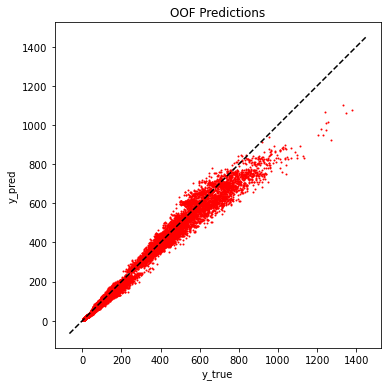

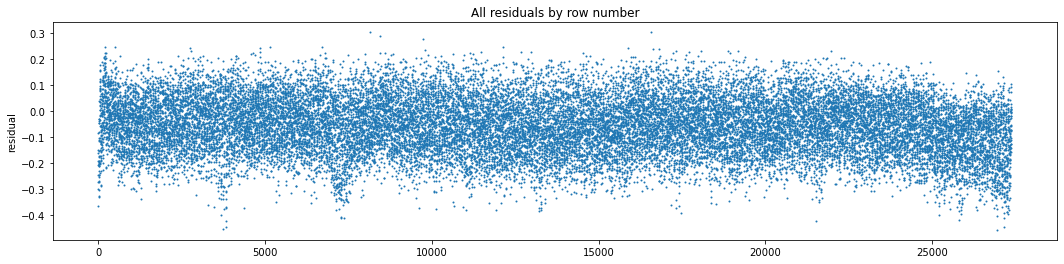

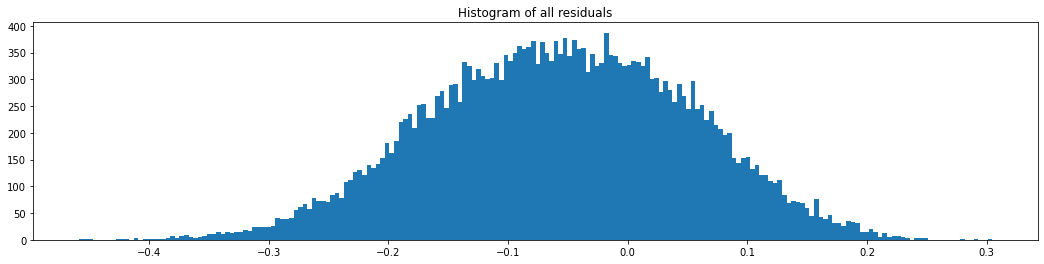

Standard deviation of log residuals: 0.107
Training on these years {2017, 2018, 2020, 2021}
Validating on these years {2019}
Fold 1 | 00:05 | SMAPE BC: 4.63970| SMAPE AC: 4.63970
Training on these years {2017, 2019, 2020, 2021}
Validating on these years {2018}
Fold 2 | 00:06 | SMAPE BC: 5.38030| SMAPE AC: 5.38030
Training on these years {2018, 2019, 2020, 2021}
Validating on these years {2017}
Fold 3 | 00:06 | SMAPE BC: 4.69260| SMAPE AC: 4.69260
Training on these years {2017, 2018, 2019, 2021}
Validating on these years {2020}
Fold 4 | 00:07 | SMAPE BC: 11.75770| SMAPE AC: 11.75770


In [59]:
_, lgb_model = train_model('lgbm', best_params, 'group', True)

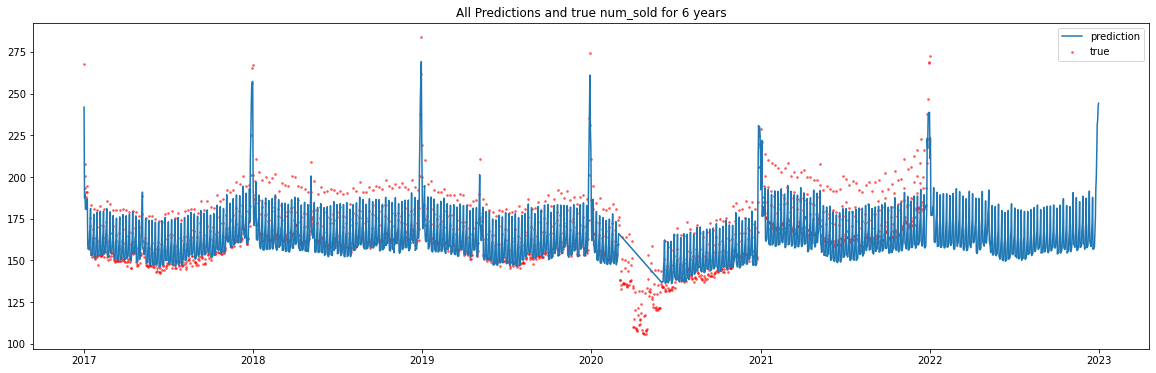

In [60]:
predict_plot(lgb_model,1)

### Submission

In [61]:
# make predictions
y_hat = np.exp(lgb_model.predict(test_eng[features]))
y_hat

array([115.04605978, 136.47173079,  21.79893694, ..., 135.9540207 ,
       609.93777531, 531.59209912])

In [62]:
sub = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,115.046060
1,136951,136.471731
2,136952,21.798937
3,136953,126.229607
4,136954,123.033919
...,...,...
27370,164320,654.411727
27371,164321,640.330050
27372,164322,135.954021
27373,164323,609.937775


In [63]:
sub.iloc[:151,:].mean()

id          137025.000000
num_sold       265.558206
dtype: float64

In [64]:
sub.to_csv('submissions/sub46.csv', index=False)